Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore,boxcox
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve,accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

# Exploratory Data Analysis - Training data

#### Reading the data using pandas

In [2]:
train_data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')

#### Creating a DataFrame for the dataset 

In [3]:
train_df=pd.DataFrame(data=train_data)

#### Briefly analysis the dataset

In [4]:
train_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


#### Checking the shape of the dataset

In [5]:
train_df.shape

(31647, 18)

#### Checking info of the dataset

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


#### Counting the no. of numerical and object columns in the dataset

In [7]:
cat_columns=[feature for feature in train_df.columns if train_df[feature].dtypes=='O']

num_columns=[feature for feature in train_df.columns if train_df[feature].dtypes!='O' and feature not in 'ID']

print('Total categorical columns is {} and total numerical columns is {}'.format(len(cat_columns),len(num_columns)))

Total categorical columns is 10 and total numerical columns is 7


After a brief analysis of the dataset it can be observed that - 

1. The size of the training dataset is 31647 rows and 18 columns
2. The total categorical columns is 10 and total numerical columns is 7.
3. By initial assesment no null values present. Need further analysis.
4. The subscribed column is our target variable.

We need to predict the clients who will agree to subscribe for term deposit. So we can say that it is a classification problem. Hence, we will create classification models for the dataset.

#### Checking for Null values 

In [8]:
total_null_values=train_df.isnull().sum()
print('The total null values present is:')
print( total_null_values)

The total null values present is:
ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


#### Checking null value using Heatmap

<Axes: >

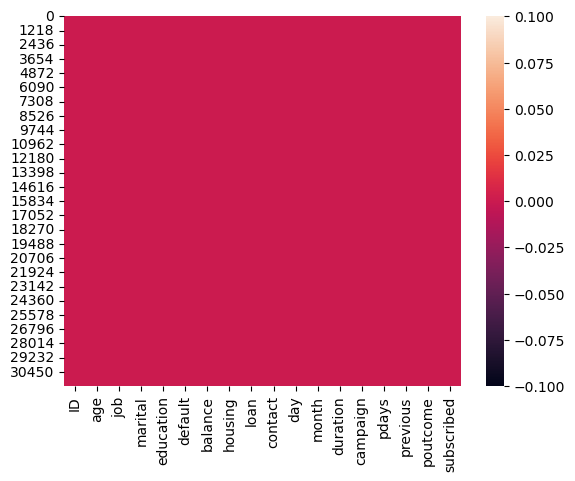

In [9]:
sns.heatmap(train_df.isnull())

- No null value presence is observed in the dataset.

#### Checking the number of unique keys and its count in categorical columns

In [10]:
for feature in cat_columns:
    uniq=train_df[feature].unique()
    print('{}: {} : {}'.format(feature,uniq,len(uniq)))
    print('\n')

job: ['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed'] : 12


marital: ['married' 'divorced' 'single'] : 3


education: ['unknown' 'secondary' 'tertiary' 'primary'] : 4


default: ['no' 'yes'] : 2


housing: ['no' 'yes'] : 2


loan: ['no' 'yes'] : 2


contact: ['telephone' 'cellular' 'unknown'] : 3


month: ['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec'] : 12


poutcome: ['unknown' 'success' 'failure' 'other'] : 4


subscribed: ['no' 'yes'] : 2




# Visualization Analysis

### Univariate Analysis

#### Countplot for each categorical column

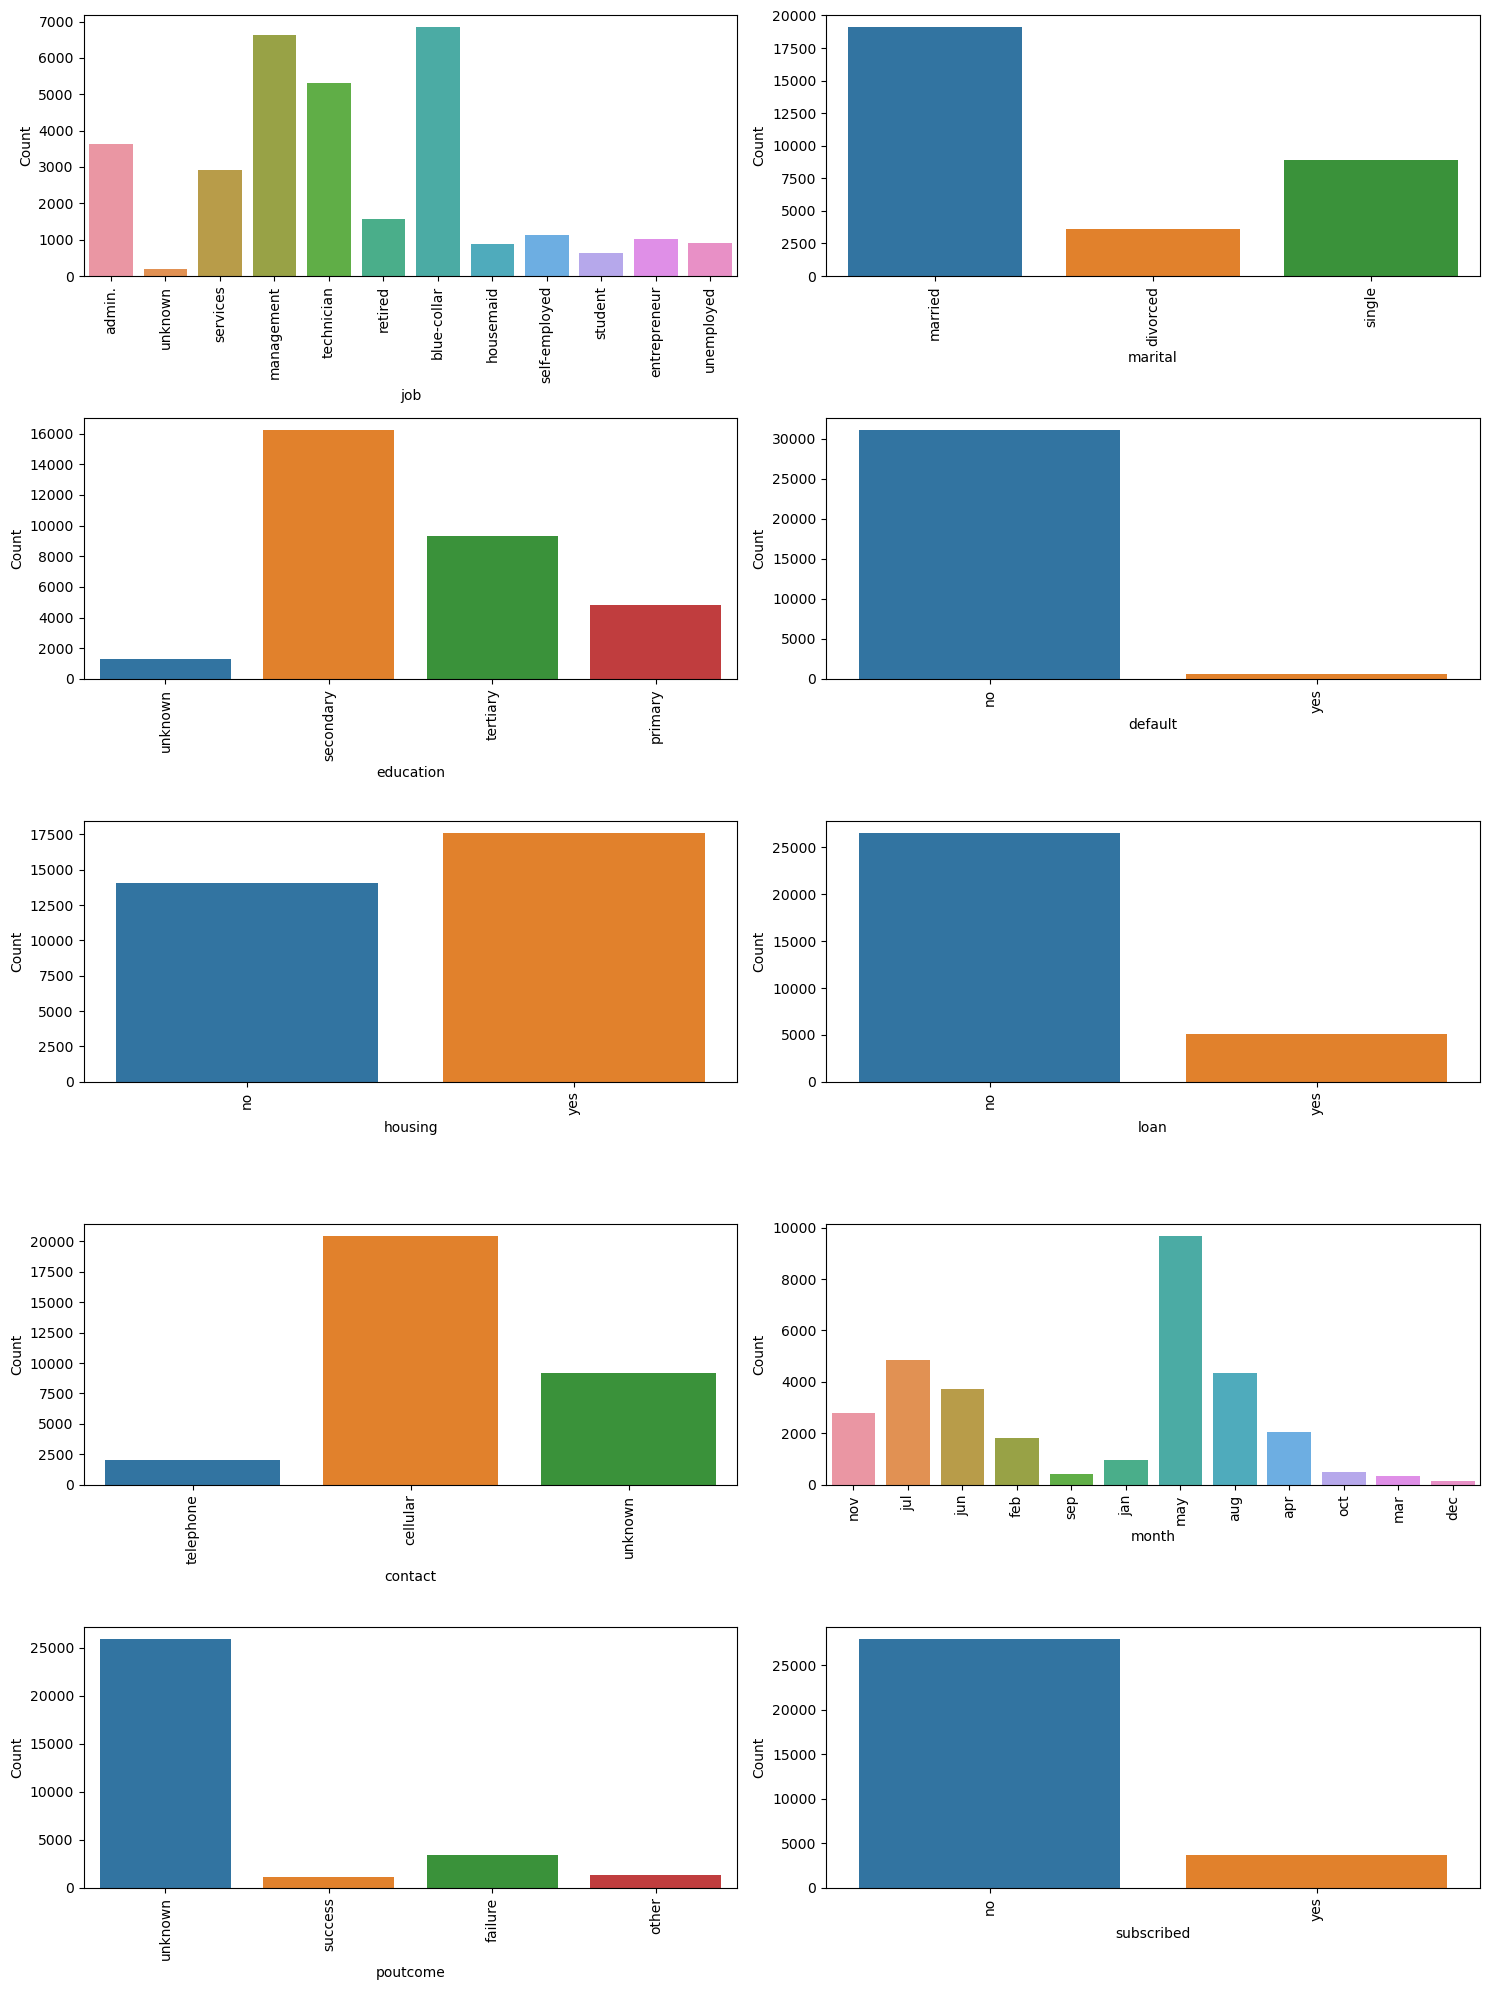

In [11]:
plt.figure(figsize=(15, 20)) 
for index, feature in enumerate(cat_columns):
    if index <len(cat_columns):
        plt.subplot(5,2,index+1)
        sns.countplot(x=feature, data=train_df)
        plt.xlabel(feature) 
        plt.ylabel('Count')
        plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

From the above count plot we can observe that -

1. Most of the clients in the dataset are working as Management, Technician and blue collar jobs. A moderate number of employees are working as Admin and services. A low number of clients jobs are unknown.
2. High number of clients in the training dataset are married. A moderate numbers of clients are sinlge. A sizable numbers of divorce clients are also present on the database.
3. High number of clients have secondary education. Moderate number of clients have tertiary education and low to moderate number are primary educated. A low number of clients education is unknown.
4. A very high number of clients in the dataset are no defaulters. A very low or minimum number of clients have defaulted.
5. High number of clients have housing loans. Also moderate to high numbers of clients have no housing loans.
6. Clients with no personal loan is very high whereas clients with personal loan is low.
7. Most of the contacts with clients are done via cellular phones. A low number of clients are contacted with telephone. A moderate number of data is unknown.
8. From previous marketing campaign, a very low number of clients have done term deposits. The rate of failure is also low however it is more than success. A very high number of data are unknown or not present. 
9. In target variable the no to term deposit is very high. Clients with yes term deposit is very low.

#### Visualising the age using histplot

<Axes: xlabel='age', ylabel='Count'>

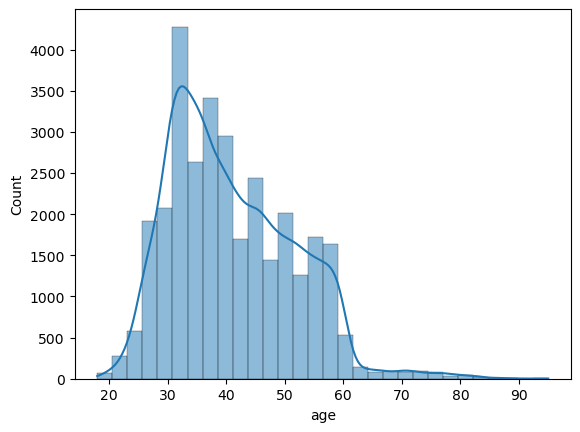

In [12]:
sns.histplot(x='age',kde=True,bins=30,data=train_df,linewidth=.2)

- The age is appears normal distributed. Further analysis needs to be performed for skewness and outliers.

#### Visualising balance using histplot

<Axes: xlabel='balance', ylabel='Count'>

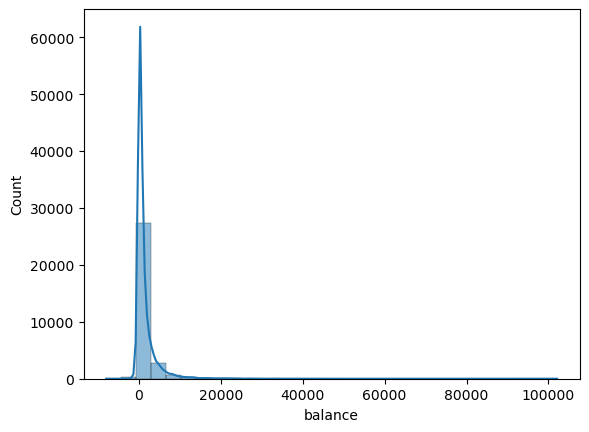

In [13]:
sns.histplot(x='balance',kde=True,bins=30,data=train_df,linewidth=.2)

- We can observe that the balance feature is highly right skewed. 

#### Visualising duration using histplot

<Axes: xlabel='duration', ylabel='Count'>

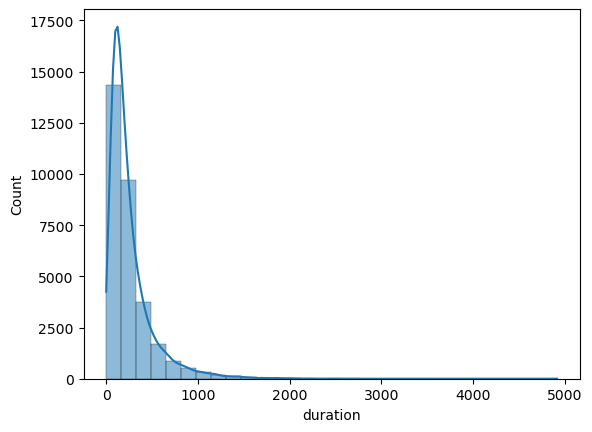

In [14]:
sns.histplot(x='duration',kde=True,bins=30,data=train_df,linewidth=.2)

- The duration column is highly right skewed. 

#### Visualising pdays using histplot

<Axes: xlabel='pdays', ylabel='Count'>

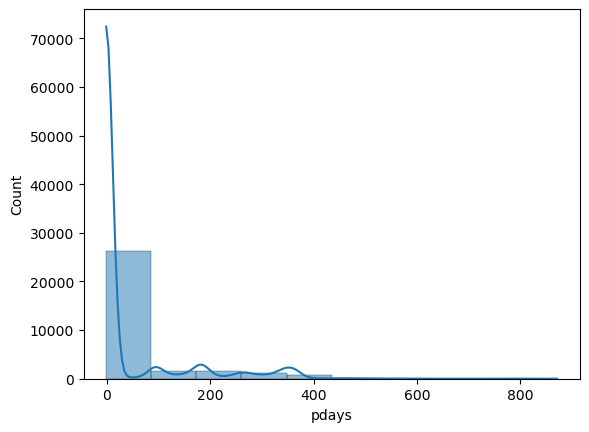

In [15]:
sns.histplot(data=train_df, x='pdays', bins=10, kde=True, linewidth=.2)

- The pdays is highly right skewed

#### Visualising campaign using hisplot 

<Axes: xlabel='campaign', ylabel='Count'>

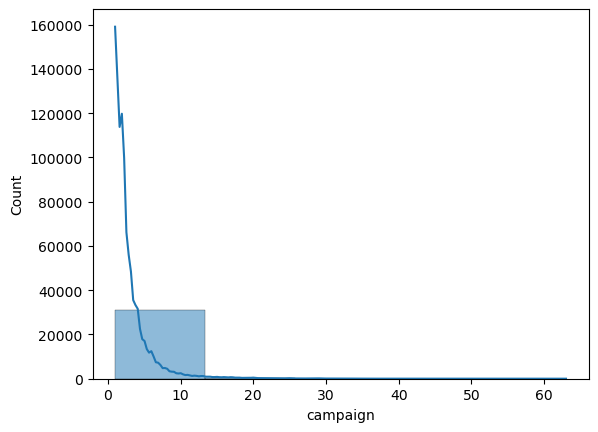

In [16]:
sns.histplot(data=train_df, x='campaign', bins=5, kde=True,linewidth=.2)

- The campaign column is highly right skewed.

### Bivariate analysis

#### Visualising the number of client who subscribed and their jobs

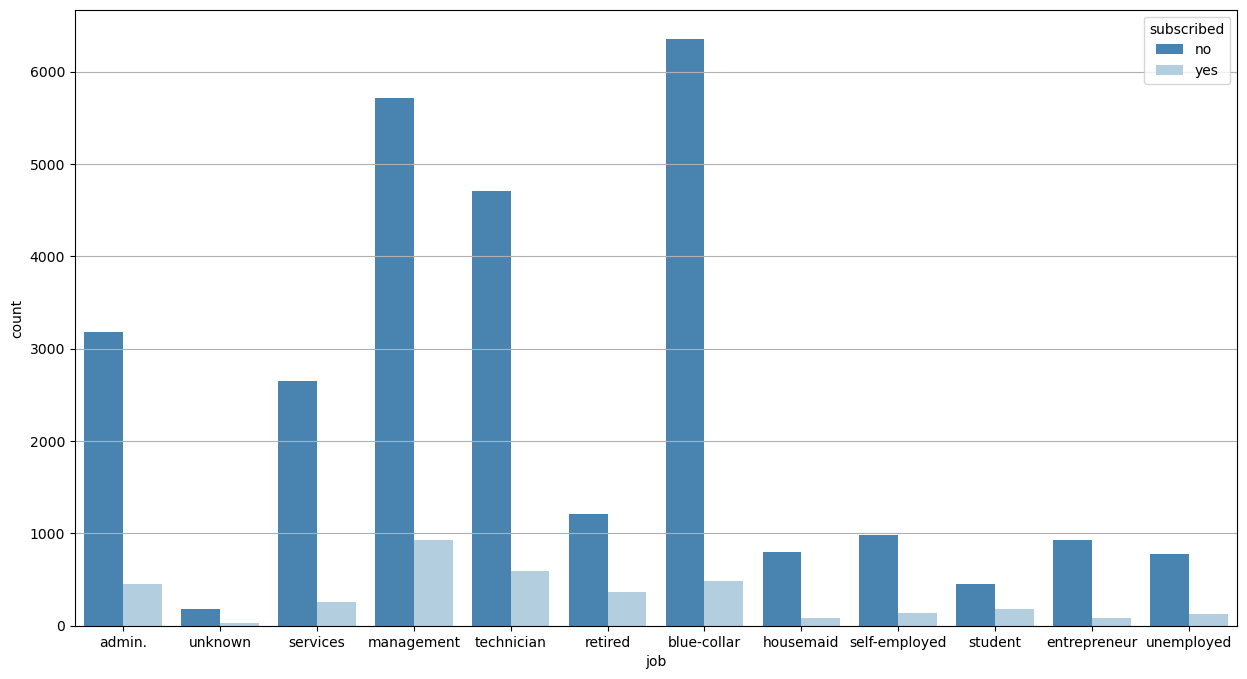

In [17]:
plt.figure(figsize=(15,8))
sns.countplot(data=train_df,x='job', hue='subscribed',palette='Blues_r')
plt.grid(axis='y')

#### Visualising numbers of married man who subscribed to term deposit

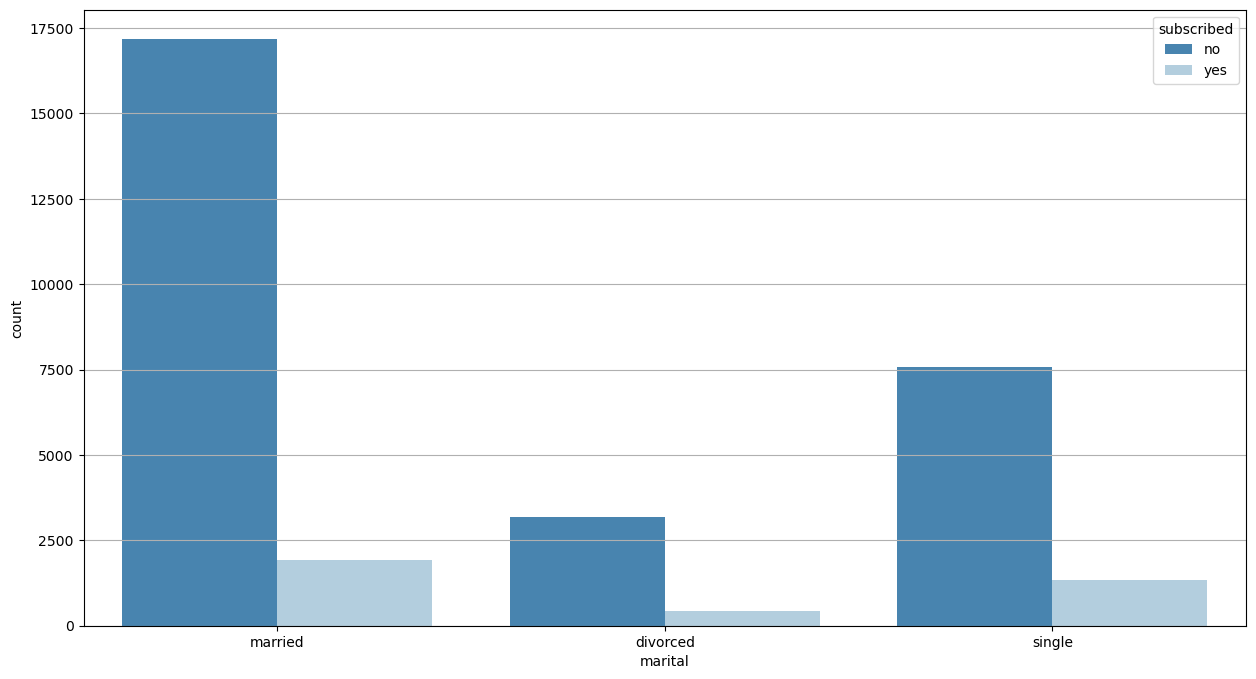

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(data=train_df,x='marital', hue='subscribed',palette='Blues_r')
plt.grid(axis='y')

- Married clients subscribed to term deposit more than single and divorced. However the difference in subscription yes and no ratio among married clients also very high. Term deposit among divorced couple is lowest. 

#### Visualising the education of clients who subscribed

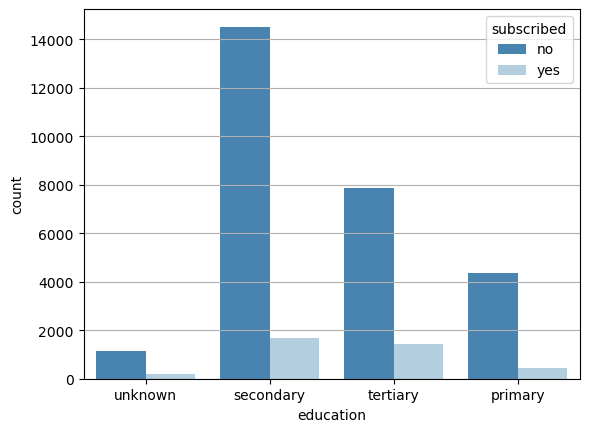

In [19]:
sns.countplot(data=train_df,x='education',hue='subscribed',palette='Blues_r')
plt.grid(axis='y')

- Clients with secondary and tertiary education who subscribed to term deposit is almost equivalent. However, the difference in ratio for subscribed yes to no is very high in secondary compared to tertiary. For clients with primary education the subscription of term insurance is low. A very low number of clients subscribed to term insurance whose education is unknown. 

#### Visualising default column for clients who subscribed to term deposit

<Axes: xlabel='default', ylabel='count'>

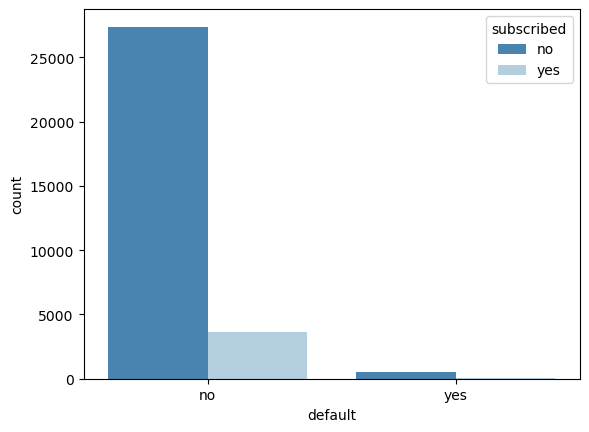

In [20]:
sns.countplot(x='default',hue='subscribed', data=train_df,palette='Blues_r')

#### Crosstab to check clients who defaulted but subscribed to term deposit

In [21]:
pd.crosstab(train_df['default'], train_df['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


- Almost all the clients who subscribed to term deposit has default as no. However, a very small number of clients with default as yes subscribed to term deposit.

#### Visualising housing loan who subscribed to term deposit

<Axes: xlabel='housing', ylabel='count'>

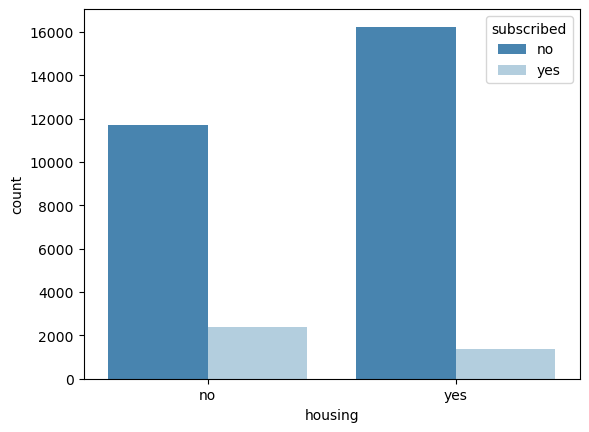

In [22]:
sns.countplot(x='housing',hue='subscribed', data=train_df,palette='Blues_r')

- We can observed that clients with no housing loan has more subscription to term insurance than with housing loans.  

#### Visualising loan who subscribed to term deposit

<Axes: xlabel='loan', ylabel='count'>

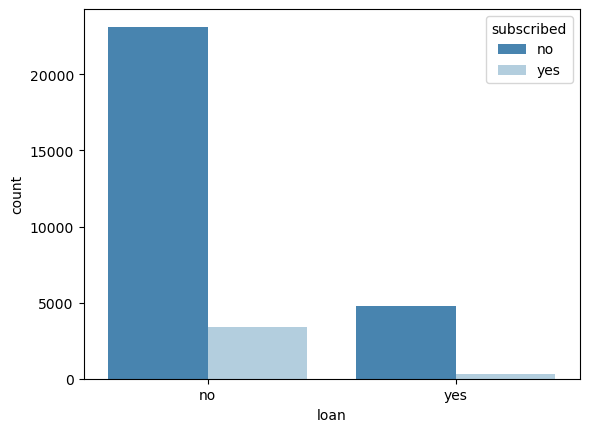

In [23]:
sns.countplot(data=train_df,x='loan',hue='subscribed',palette='Blues_r')

- Clients with no loan has high subscription compared to clients with loans

#### Visualising contact with subscription 

<Axes: xlabel='contact', ylabel='count'>

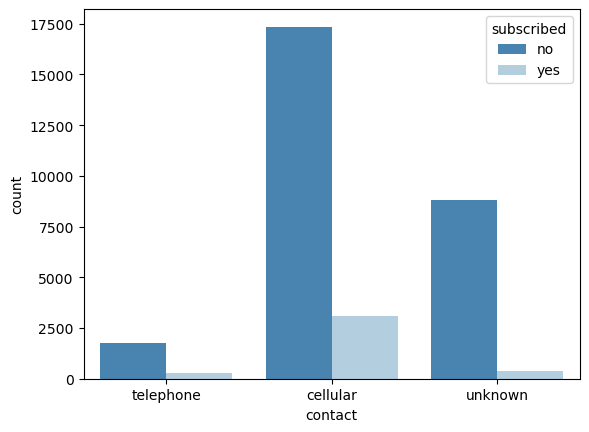

In [24]:
sns.countplot(data=train_df,x='contact',hue='subscribed',palette='Blues_r')

- Clients who are contacted via cellular phone have higher subscription comparing to clients who were contacted via telephone. Also there are subscription among clients whose data is unknown.

#### Visualising poutcome with subscription 

<Axes: xlabel='poutcome', ylabel='count'>

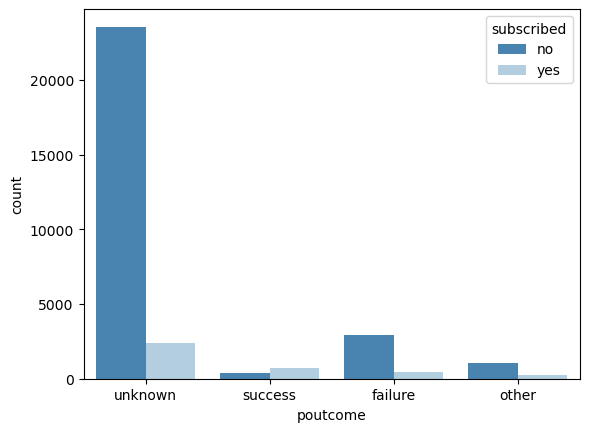

In [25]:
sns.countplot(data=train_df,x='poutcome',hue='subscribed',palette='Blues_r')

- The subscription 'yes' for unknown categories is more compared to the other 3 categories

#### Visualising subscription using catplot for clients with job and marital  

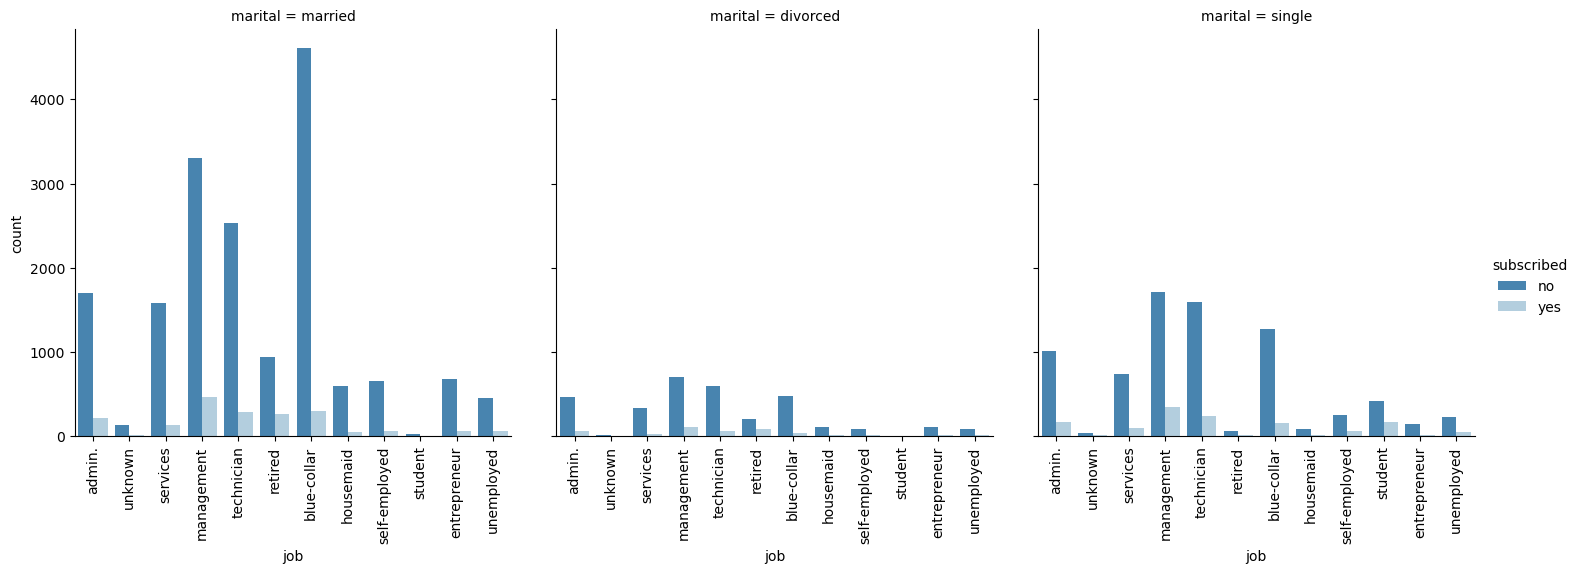

In [26]:
g = sns.catplot(data=train_df, x='job', hue='subscribed', col='marital', kind='count', palette='Blues_r')
g.set_xticklabels(rotation=90)

- The subscription to term deposit with jobs like management, technician, blue-collar is more among married couples. The married clients with jobs like entrepreneur, housemail, self-employed is low.
- Divorced clients has the lowest subscription throughout jobs amoung all three class of marital status.
- Jobs like management, technician has high subscription compared to other jobs among clients with marital as single.

#### Visualising subscribed with jobs and housing

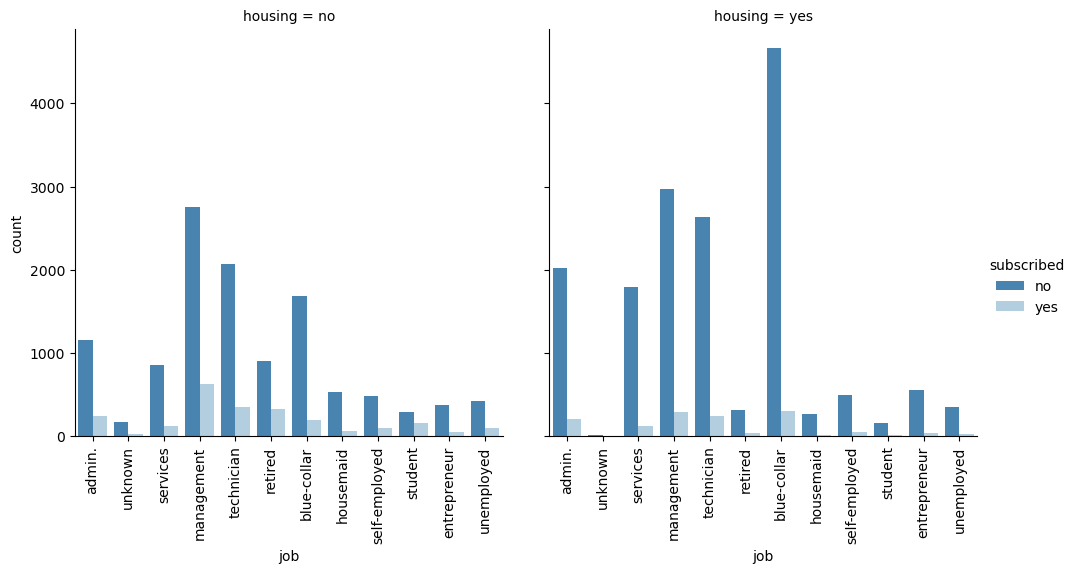

In [27]:
cp=sns.catplot(data=train_df,x='job',hue='subscribed',col='housing',palette='Blues_r',kind='count')
cp.set_xticklabels(rotation=90)

- We can observed that clients across all jobs has except blue-collar with no home loan has subscribed to term deposit.

#### Visualising client subscription with jobs and personal loans

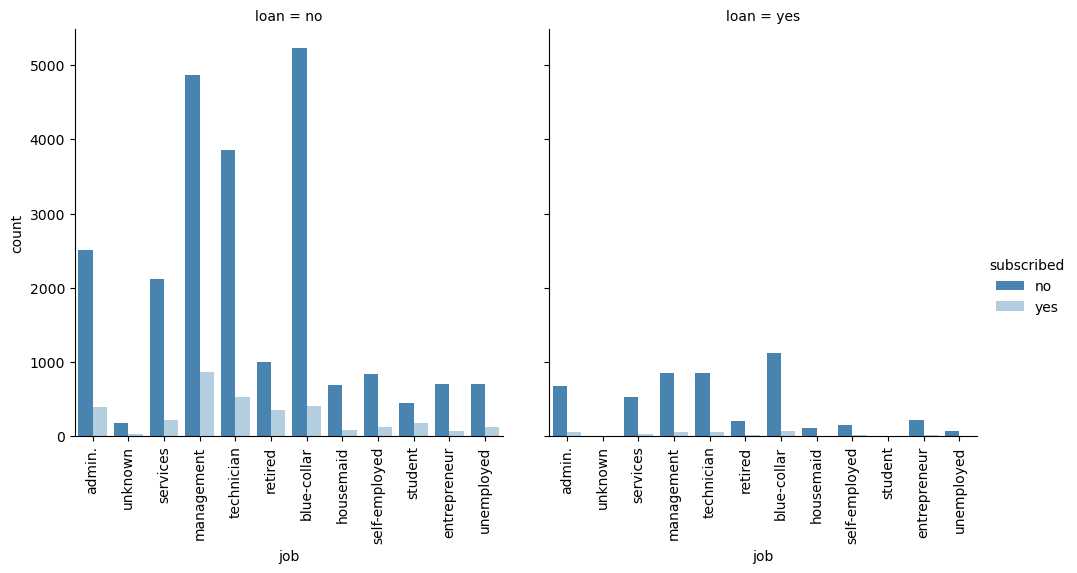

In [28]:
cp=sns.catplot(data=train_df,x='job',hue='subscribed',col='loan',kind='count',palette='Blues_r')
cp.set_xticklabels(rotation=90)

- We can observe that clients with no personal loan across all jobs has more subscribed to term deposit. 

#### Visualising subscribed and duration using violinplot

<Axes: xlabel='subscribed', ylabel='duration'>

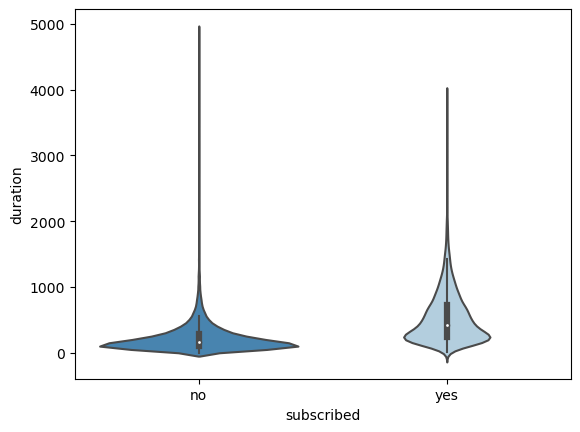

In [29]:
sns.violinplot(x='subscribed', y='duration', data=train_df, palette='Blues_r')

- We can observe that subscription to term deposit is more when call duration is more.

#### Visualising subscribed and campaign using violinplot

<Axes: xlabel='subscribed', ylabel='campaign'>

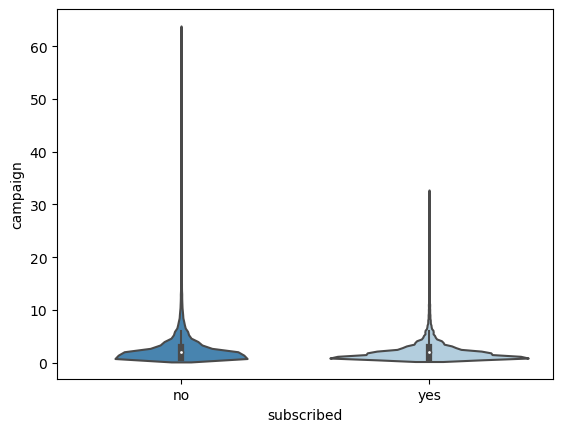

In [30]:
sns.violinplot(data=train_df,x='subscribed',y='campaign',palette='Blues_r')

- Campaign doesnot have any positive affect on client's subscription.

### Multivariate Visualization

#### Visualising mulitivariate analysis using pairplot

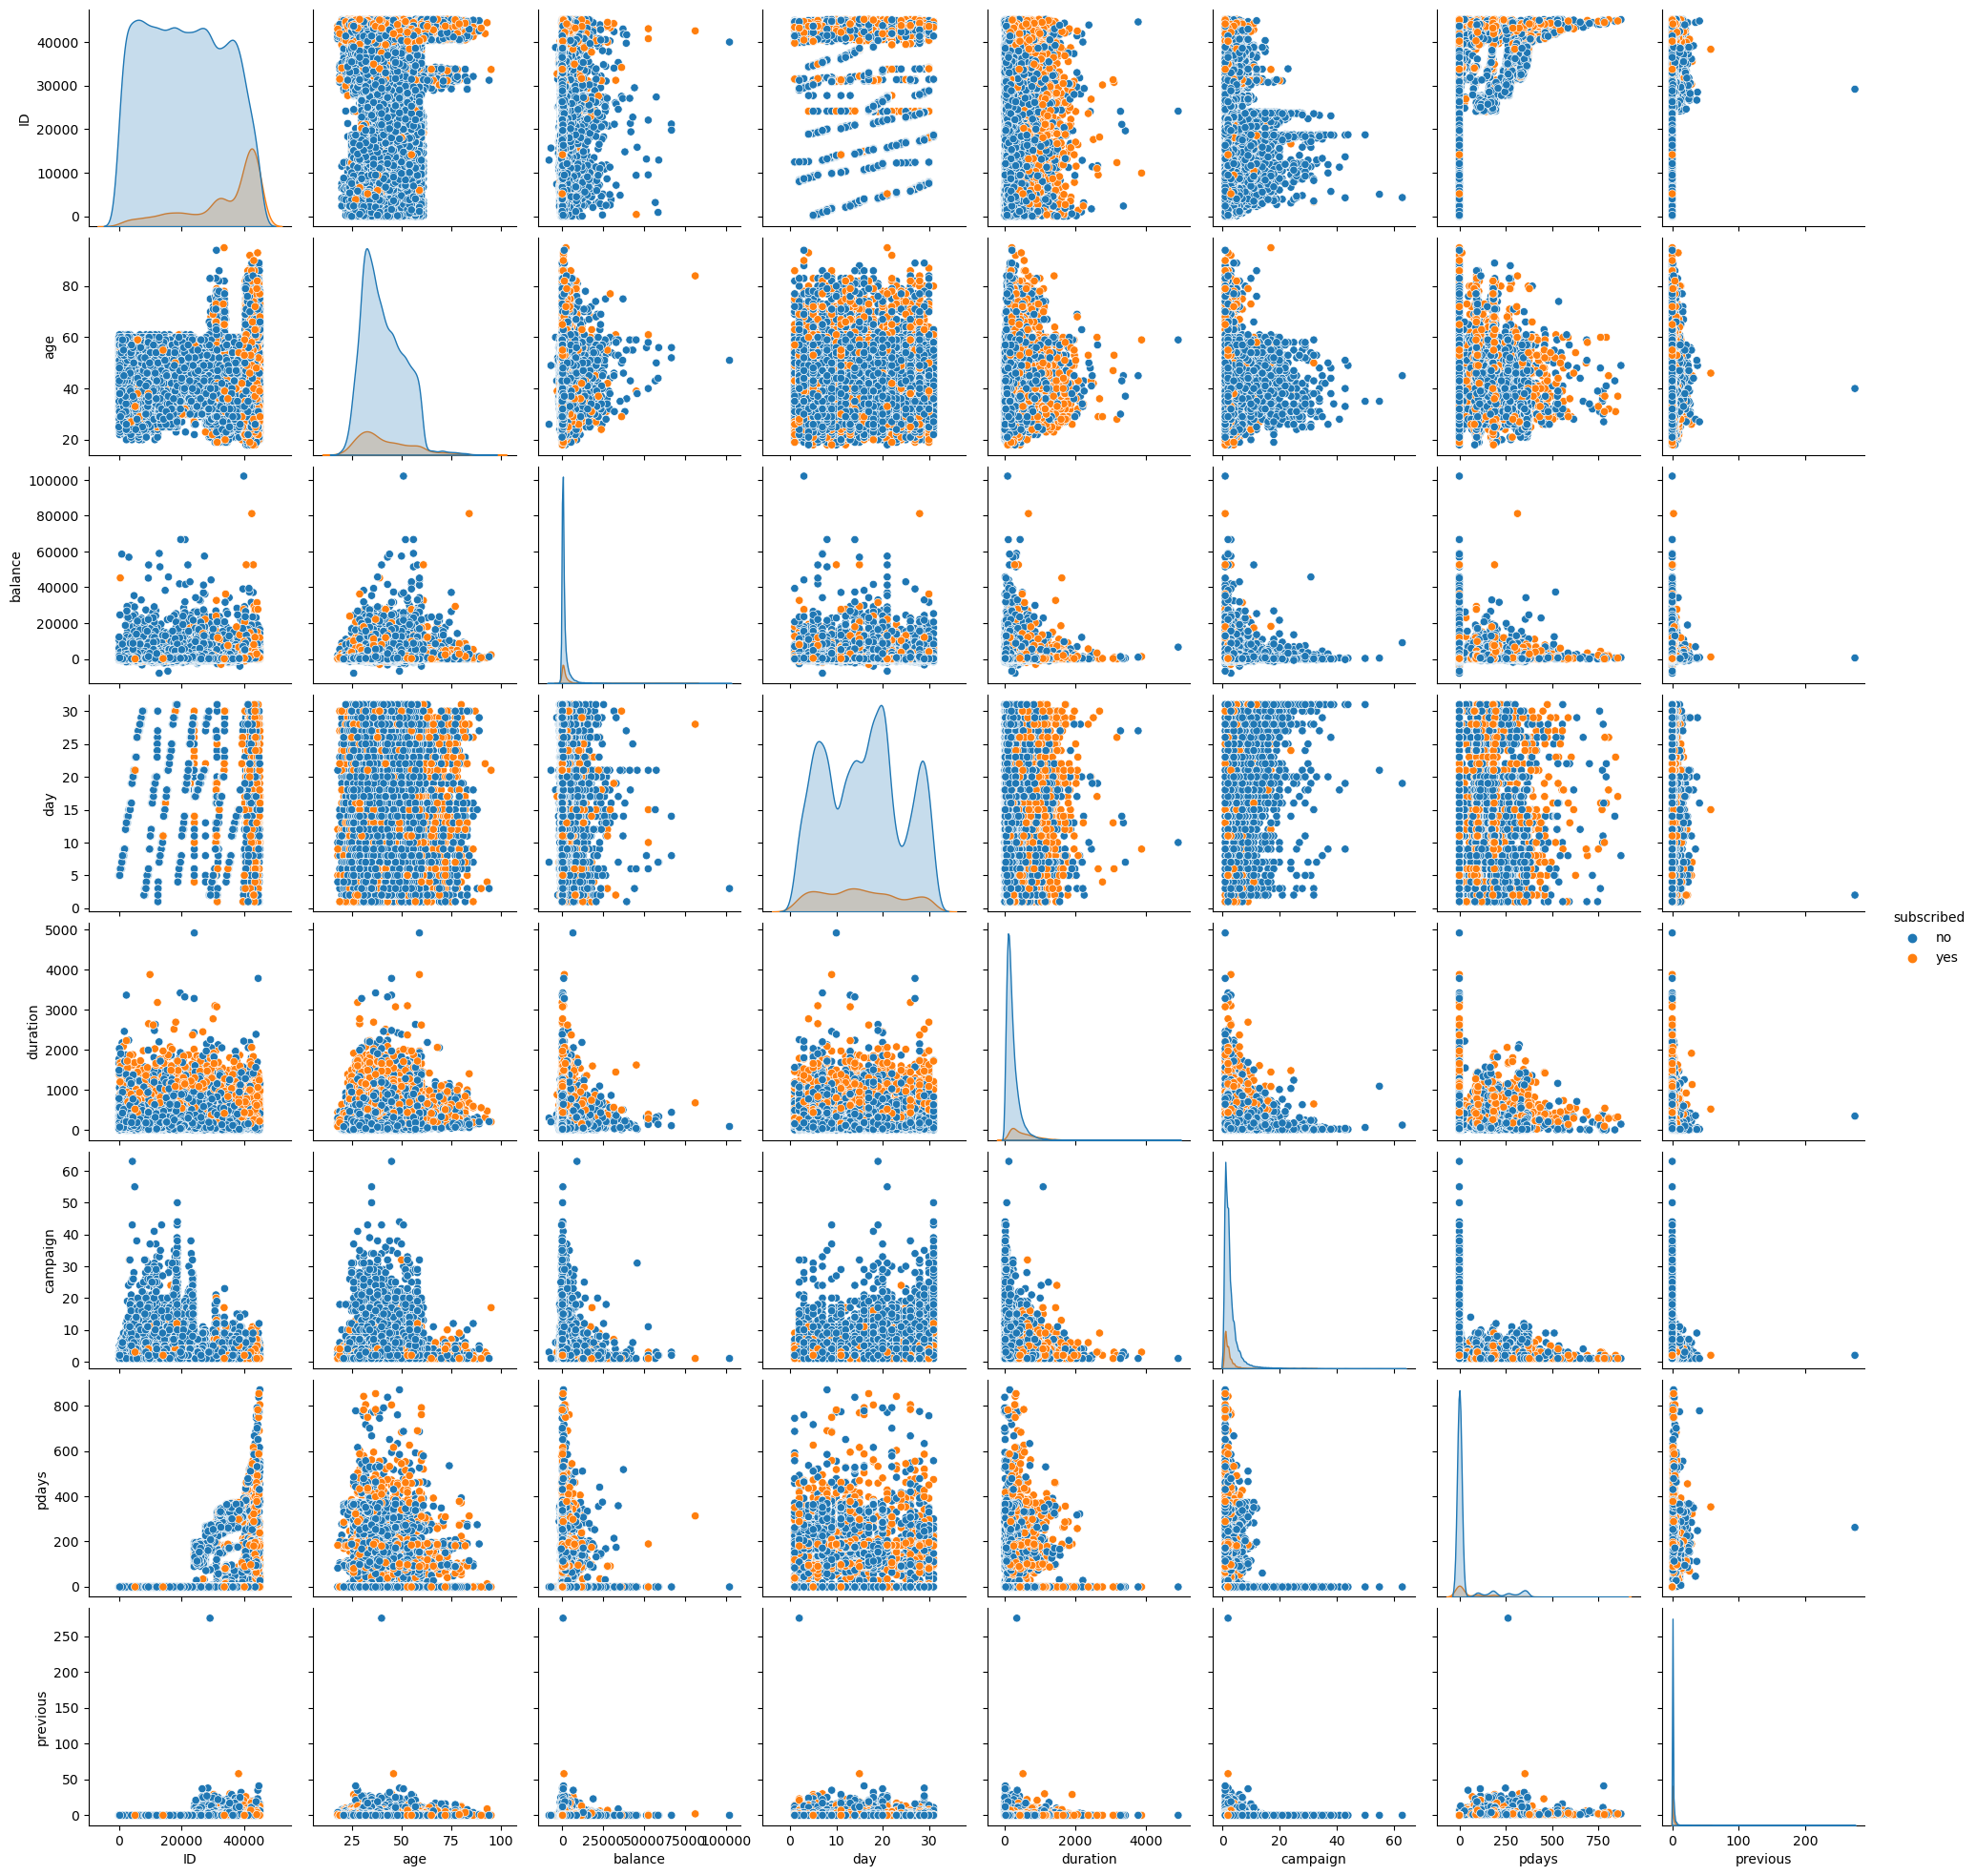

In [31]:
sns.pairplot(train_df,hue='subscribed')

# Feature Engineering

### Checking presence of Outliers 

#### Checking outliers using Boxplot

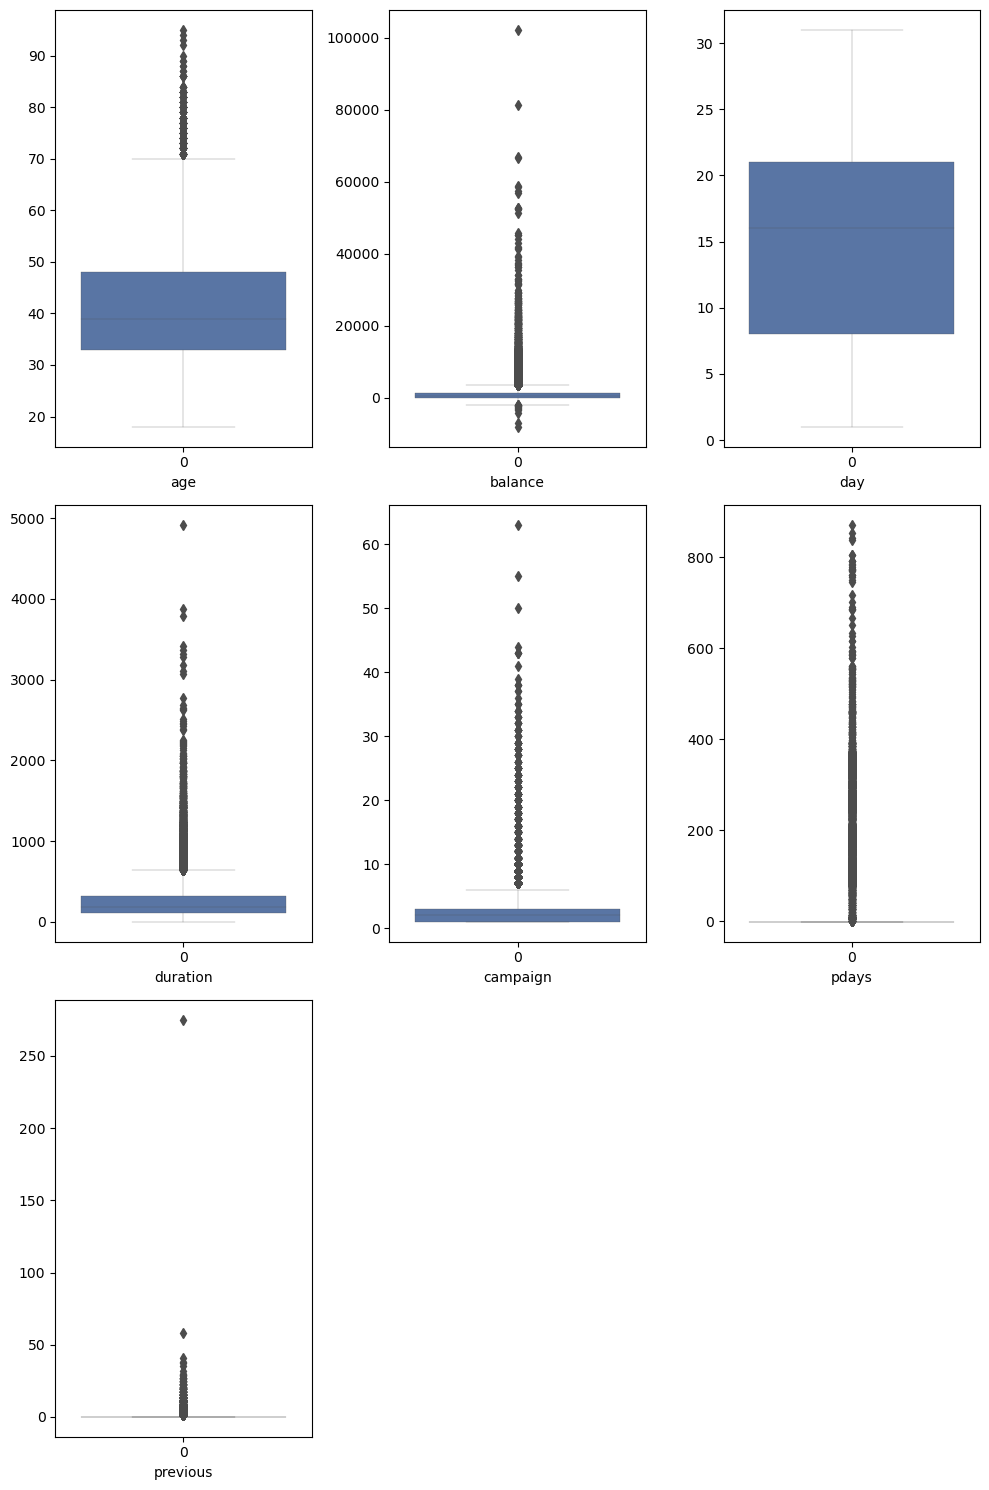

In [32]:
data=train_df.copy()
plt.figure(figsize=(10,15))
for index,feature in enumerate(num_columns):
    plt.subplot((len(num_columns)//3)+1,3,index+1)
    sns.boxplot(data[feature],palette='deep',linewidth=.2)
    plt.xlabel(feature)
plt.tight_layout()

- We can observe that all the features have high presence of outliers accept days. We need to perform further analysis to check for outliers

#### Grouping balance and subscribed for balance to find value_count with unique frequencies

In [33]:
train_df.groupby(['subscribed','balance'])['balance'].value_counts()

subscribed  balance
no          -8019      1
            -6847      1
            -4057      1
            -3372      1
            -2712      1
                      ..
yes          32685     1
             36252     1
             45248     1
             52587     2
             81204     1
Name: count, Length: 7969, dtype: int64

- We can observe that clients with balance from 32685 onwards have term deposit. Clients with negative balance has no term insurance.  

#### Grouping pdays and subscribed for pdays to find value_count with unique frequencies

In [34]:
train_df.groupby(['subscribed','pdays'])['pdays'].value_counts()

subscribed  pdays
no          -1       23553
             1           6
             2          24
             4           1
             5           7
                     ...  
yes          792         1
             804         1
             805         1
             842         1
             854         1
Name: count, Length: 804, dtype: int64

#### Checking pdays value_count with unique value frequencies

In [35]:
train_df['pdays'].value_counts(normalize=True)

pdays
-1      0.819161
 182    0.003729
 92     0.003160
 91     0.002749
 183    0.002686
          ...   
 51     0.000032
 20     0.000032
 25     0.000032
 526    0.000032
 382    0.000032
Name: proportion, Length: 509, dtype: float64

#### Checking the number of subscription in pdays with value -1.

In [36]:
filtered_df=train_df[train_df['pdays']==-1]
filtered_df.groupby(['subscribed','pdays'])['pdays'].value_counts()

subscribed  pdays
no          -1       23553
yes         -1        2371
Name: count, dtype: int64

- The pdays has imbalanced data with 82 percent of the value is -1. The presence of outliers is extremely high. Hence we can drop the column.

#### Dropping the column pdays from dataset

In [37]:
data.drop('pdays',axis=1,inplace=True)

#### Checking previous value_count with unique value frequencies

In [38]:
train_df['previous'].value_counts(normalize=True)

previous
0      0.819161
1      0.060701
2      0.046797
3      0.024647
4      0.015831
5      0.009827
6      0.005941
7      0.004361
8      0.002559
9      0.002022
10     0.001548
11     0.001454
13     0.000948
12     0.000948
15     0.000474
14     0.000442
17     0.000348
16     0.000253
19     0.000253
23     0.000190
18     0.000158
20     0.000158
21     0.000126
22     0.000126
25     0.000126
27     0.000126
26     0.000063
29     0.000063
24     0.000063
275    0.000032
28     0.000032
32     0.000032
30     0.000032
38     0.000032
58     0.000032
35     0.000032
41     0.000032
37     0.000032
Name: proportion, dtype: float64

- We can observe that 82 percent of previous column has value as 0. 

#### Checking the number of subscribed in previous with value 0.

In [39]:
filtered_df=train_df[train_df['previous']==0]
filtered_df.groupby(['subscribed','previous'])['previous'].value_counts()

subscribed  previous
no          0           23553
yes         0            2371
Name: count, dtype: int64

- The presence of outliers in previous column is high and 82 percent of the data in the column is 0. Hence we can drop the column.

#### Dropping the column previous from data

In [40]:
data.drop('previous',axis=1,inplace=True)

#### Numerical column in the dataset after removing pdays and previous

In [41]:
num_columns=[feature for feature in data.columns if data[feature].dtypes!='O' and feature not in 'ID']
num_columns

['age', 'balance', 'day', 'duration', 'campaign']

#### Analyzing outliers using zscore

In [42]:
def outliers_detection(data):
    z_score=np.abs(zscore(data[num_columns]))
    print(np.where(z_score>3))
    return z_score

In [43]:
z_score=outliers_detection(train_df)

(array([   21,    26,   134, ..., 31598, 31622, 31646], dtype=int64), array([4, 1, 4, ..., 4, 0, 3], dtype=int64))


#### Removing outliers

In [44]:
def removing_outliers(z_score,data):
    data=data[(z_score<3).all(axis=1)]
    return data

In [45]:
data=removing_outliers(z_score,data)

#### Checking total data loss after removing outliers

In [46]:
total_data_loss=train_df.shape[0]-data.shape[0]
print('The total data lost due to outliers is:', total_data_loss)

The total data lost due to outliers is: 2026


#### Checking total percentage of data loss after removing outliers

In [47]:
total_data=train_df.shape[0]
percent=total_data_loss*100/total_data
print('Total percentage of data lost is: {:.2f}%'.format(percent))

Total percentage of data lost is: 6.40%


- Total data lost after outliers removal is 6.4% which is under acceptable range.

#### Assigning data to train_df 

In [48]:
train_df=data

#### Checking the shape of dataset after removing outliers

In [49]:
train_df.shape

(29621, 16)

# Checking the skewness

#### Checking skewness using skew method

In [50]:
train_df[num_columns].skew()

age         0.450185
balance     2.445199
day         0.101497
duration    1.589653
campaign    2.060107
dtype: float64

- Balance, duration and campaign has high skewness present.

#### Checking for the presence of value 0 in all the columns

In [51]:
columns_num_feature=(train_df[num_columns]==0).any()
columns_num_feature

age         False
balance      True
day         False
duration     True
campaign    False
dtype: bool

- Balance and duration has value 0 present 

#### Removing skewness in balance using cube root

In [52]:
balance_skewed_cube_root=np.cbrt(train_df['balance'])

In [53]:
balance_skewed_cube_root.skew()

-0.44235551050849875

#### Applying cube root to balance

In [54]:
train_df['balance']=balance_skewed_cube_root

In [55]:
train_df[num_columns].skew()

age         0.450185
balance    -0.442356
day         0.101497
duration    1.589653
campaign    2.060107
dtype: float64

#### Removing skewness in duration using cube root

In [56]:
duration_skewed=np.cbrt(train_df['duration'])

In [57]:
duration_skewed.skew()

0.2882006137894335

#### Applying cube root to duration

In [58]:
train_df['duration']=duration_skewed

In [59]:
train_df[num_columns].skew()

age         0.450185
balance    -0.442356
day         0.101497
duration    0.288201
campaign    2.060107
dtype: float64

#### Removing skewness in campaign using log transformation

In [60]:
campaign_skewed=np.log(train_df['campaign'])

In [61]:
campaign_skewed.skew()

0.5975261957973541

####  Applying log to campaign

In [62]:
train_df['campaign']=campaign_skewed

#### Checking the final skewness in the dataset

In [63]:
train_df[num_columns].skew()

age         0.450185
balance    -0.442356
day         0.101497
duration    0.288201
campaign    0.597526
dtype: float64

- The skewness in the dataset is under acceptable range.

# Feature selection

#### Checking all the features in the dataset

In [64]:
features=train_df.columns
features

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'poutcome', 'subscribed'],
      dtype='object')

- ID column has no role in the dataset hence can be removed.
- From visualization we observed that there are only 2 categories in deafult i.e Yes and No. High volume of category in default is No. Hence we can remove after verifying the percentage share.

#### Dropping the column ID

In [65]:
train_df.drop('ID',axis=1,inplace=True)

####  Checking the percentage of yes and no in default

In [66]:
train_df['default'].value_counts(normalize=True)

default
no     0.981128
yes    0.018872
Name: proportion, dtype: float64

- The percentage of No category in default is 98%. Hence we can remove default column

#### Dropping default column

In [67]:
train_df.drop('default',axis=1,inplace=True)

# Encoding categorical columns

#### Listing categorical columns for encoding

In [68]:
cat_columns=[feature for feature in train_df.columns if train_df[feature].dtypes=='O']
cat_columns

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

#### Checking the unique values for each category

In [69]:
for feature in cat_columns:
    uniq=train_df[feature].unique()
    print('{}: {} : {}'.format(feature,uniq,len(uniq)))
    print('\n')

job: ['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed'] : 12


marital: ['married' 'divorced' 'single'] : 3


education: ['unknown' 'secondary' 'tertiary' 'primary'] : 4


housing: ['no' 'yes'] : 2


loan: ['no' 'yes'] : 2


contact: ['telephone' 'cellular' 'unknown'] : 3


month: ['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec'] : 12


poutcome: ['unknown' 'success' 'failure' 'other'] : 4


subscribed: ['no' 'yes'] : 2




#### Implementing Label encoding 

In [70]:
le=LabelEncoder()
train_df[cat_columns]=train_df[cat_columns].apply(lambda column: le.fit_transform(column))

In [71]:
train_df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome,subscribed
0,56,0,1,3,12.456918,0,0,1,19,9,3.530348,0.693147,3,0
1,31,11,1,1,1.442250,0,0,0,20,5,4.497941,0.693147,3,0
2,27,7,1,1,9.622603,1,0,0,18,5,6.214465,0.000000,3,0
3,57,4,0,2,14.868480,0,0,0,22,6,9.535417,0.000000,2,1
4,31,9,1,1,4.918685,1,0,0,4,3,7.243156,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31641,37,9,2,2,10.939057,0,0,2,6,6,7.617412,0.693147,3,0
31642,29,4,2,2,0.000000,1,0,0,12,8,4.876999,0.693147,3,0
31643,53,4,0,2,7.243156,0,1,0,5,6,7.594363,0.693147,3,1
31644,32,4,2,2,6.782423,0,0,0,7,1,3.332222,1.098612,3,0


# Analysing the dataset through correlation

<Axes: >

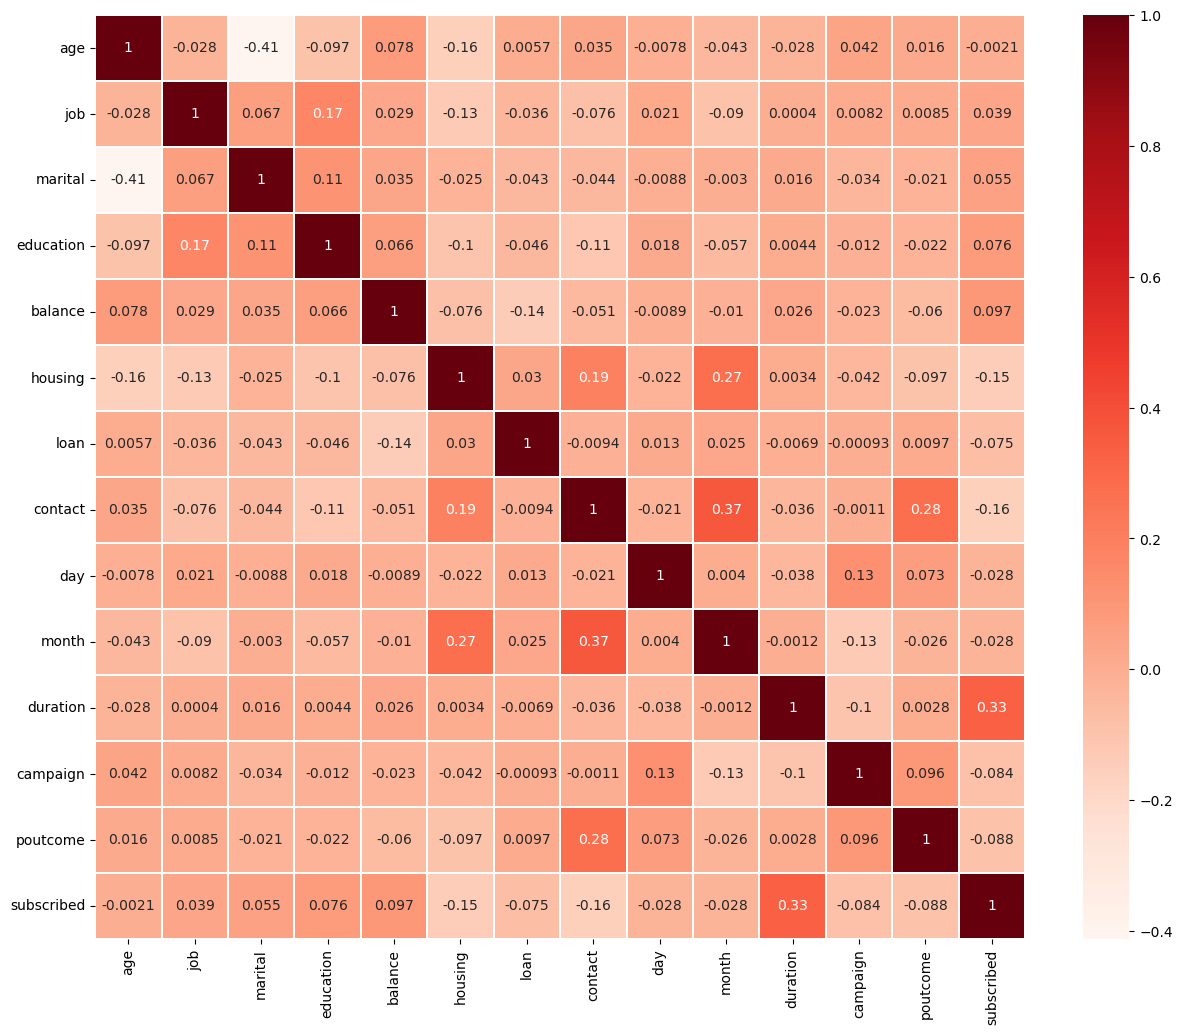

In [72]:
plt.figure(figsize=(15,12))
sns.heatmap(train_df.corr(),annot=True,fmt='.2g',linewidth=.2,cmap='Reds')

- We can observe that all columns except duration has very low correlation with subscribed. The column duration has moderate correlation with subscribed.

# Scaling the Dataset

#### Separating dependent and target columns

In [73]:
x=train_df.drop('subscribed',axis=1)
y=train_df['subscribed']

####  Applying StandardScaler

In [74]:
def StandardScaling(x):
    ss=StandardScaler()
    x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
    return x

In [75]:
x=StandardScaling(x)

In [76]:
x

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,1.532586,-1.312029,-0.280275,2.389226,0.861513,-1.134297,-0.444557,0.395185,0.394111,1.152417,-1.426962,0.044649,0.445814
1,-0.951862,2.028204,-0.280275,-0.296845,-0.918005,-1.134297,-0.444557,-0.713631,0.514410,-0.183515,-0.809859,0.044649,0.445814
2,-1.349374,0.813574,-0.280275,-0.296845,0.403604,0.881603,-0.444557,-0.713631,0.273812,-0.183515,0.284890,-1.024996,0.445814
3,1.631964,-0.097399,-1.925219,1.046190,1.251122,-1.134297,-0.444557,-0.713631,0.755009,0.150468,2.402897,-1.024996,-0.563469
4,-0.951862,1.420889,-0.280275,-0.296845,-0.356356,0.881603,-0.444557,-0.713631,-1.410378,-0.851482,0.940960,-1.024996,0.445814
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29616,-0.355595,1.420889,1.364669,1.046190,0.616289,-1.134297,-0.444557,1.504000,-1.169780,0.150468,1.179649,0.044649,0.445814
29617,-1.150618,-0.097399,1.364669,1.046190,-1.151013,0.881603,-0.444557,-0.713631,-0.447984,0.818434,-0.568107,0.044649,0.445814
29618,1.234453,-0.097399,-1.925219,1.046190,0.019183,-1.134297,2.249432,-0.713631,-1.290079,0.150468,1.164949,0.044649,0.445814
29619,-0.852484,-0.097399,1.364669,1.046190,-0.055253,-1.134297,-0.444557,-0.713631,-1.049480,-1.519448,-1.553321,0.670351,0.445814


# Variance Inflation Factor

#### Checking the variance inflation faction

In [77]:
def vif_cal(x):
    vif=pd.DataFrame()
    vif['Features']=x.columns
    vif['VIF Factor']=[VIF(x.values,i) for i in range(x.shape[1])]
    return vif

In [78]:
vif_cal(x)

,Features,VIF Factor
0,age,1.271263
1,job,1.049952
2,marital,1.230304
3,education,1.065208
4,balance,1.043938
5,housing,1.173879
6,loan,1.024767
7,contact,1.324120
8,day,1.025407
9,month,1.255004


- The VIF factor in the dataset is within the acceptable range.

#  Imbalance dataset check

####  Checking the number of value counts in target

In [79]:
y.value_counts()

subscribed
0    26501
1     3120
Name: count, dtype: int64

- We can observe that the dataset is imbalanced with value counts for no is 26501 and yes is 3120. Hence we need to apply SMOTE to make the dataset balanced.

#### Applying SMOTE to make the dataset balance

In [80]:
sm=SMOTE()
x,y=sm.fit_resample(x,y)

#### Verify the dataset

In [81]:
y.value_counts()

subscribed
0    26501
1    26501
Name: count, dtype: int64

- The dataset is balanced and we start the modelling

# Modelling

#### Evaluating the best random_state using Logistic regression

In [82]:
def best_random_state(x,y):
    best_randomstate=0
    best_score=0
    
    lr=LogisticRegression()
    for rs in range (1,201):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rs)
        lr.fit(x_train,y_train)
        prediction=lr.predict(x_test)
        score=accuracy_score(y_test,prediction)
        
        if score>best_score:
            best_score=score
            best_randomstate=rs
    print('Accuracy score: {} and Random state: {}'.format(best_score, best_randomstate))

In [83]:
best_random_state(x,y)

Accuracy score: 0.8136744396649309 and Random state: 84


#### Spliting dataset into train and test

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=77)

#### Logistic regression model

In [85]:
def logistic_regression(x_train,x_test,y_train,y_test):
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    lr_pred=lr.predict(x_test)
    
    acc_lr=accuracy_score(y_test,lr_pred)
    print('The accuracy using Logistic regression is: {:4f}% '.format((acc_lr)*100))
    print(confusion_matrix(y_test,lr_pred))
    print(classification_report(y_test,lr_pred))
    
    return lr_pred, acc_lr

In [86]:
lr_pred, acc_lr=logistic_regression(x_train,x_test,y_train,y_test)

The accuracy using Logistic regression is: 80.837683% 
[[6263 1659]
 [1388 6591]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      7922
           1       0.80      0.83      0.81      7979

    accuracy                           0.81     15901
   macro avg       0.81      0.81      0.81     15901
weighted avg       0.81      0.81      0.81     15901



#### Support Vector Classification

In [87]:
def support_vector(x_train,x_test,y_train,y_test):
    svc=SVC()
    svc.fit(x_train,y_train)
    svc_pred=svc.predict(x_test)
    acc_svc=accuracy_score(y_test,svc_pred)
    
    print('The accuracy using SVC is: {:4f}% '.format((acc_svc)*100))
    print(confusion_matrix(y_test,svc_pred))
    print(classification_report(y_test,svc_pred))
    
    return svc_pred, acc_svc

In [88]:
svc_pred, acc_svc=support_vector(x_train,x_test,y_train,y_test)

The accuracy using SVC is: 87.969310% 
[[6556 1366]
 [ 547 7432]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      7922
           1       0.84      0.93      0.89      7979

    accuracy                           0.88     15901
   macro avg       0.88      0.88      0.88     15901
weighted avg       0.88      0.88      0.88     15901



#### Random Forest Classifier

In [89]:
def random_forest(x_train,x_test,y_train,y_test):
    
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    rfc_pred=rfc.predict(x_test)
    
    acc_rfc=accuracy_score(y_test,rfc_pred)
    print('The accuracy using Random Forest is: {:4f}% '.format((accuracy_score(y_test,rfc_pred))*100))
    print(confusion_matrix(y_test,rfc_pred))
    print(classification_report(y_test,rfc_pred))
    
    return rfc_pred,acc_rfc

In [90]:
rfc_pred,acc_rfc = random_forest(x_train,x_test,y_train,y_test)

The accuracy using Random Forest is: 95.132382% 
[[7397  525]
 [ 249 7730]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7922
           1       0.94      0.97      0.95      7979

    accuracy                           0.95     15901
   macro avg       0.95      0.95      0.95     15901
weighted avg       0.95      0.95      0.95     15901



#### Adaboost Classifier

In [91]:
def adaboost(x_train,x_test,y_train,y_test):
    
    abc=AdaBoostClassifier()
    abc.fit(x_train,y_train)
    abc_pred=abc.predict(x_test)
    
    acc_abc=accuracy_score(y_test,abc_pred)
    print('The accuracy using Adaboost is: {:4f}% '.format((accuracy_score(y_test,abc_pred))*100))
    print(confusion_matrix(y_test,abc_pred))
    print(classification_report(y_test,abc_pred))
    
    return abc_pred, acc_abc

In [92]:
abc_pred, acc_abc = adaboost(x_train,x_test,y_train,y_test)

The accuracy using Adaboost is: 88.208289% 
[[7002  920]
 [ 955 7024]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7922
           1       0.88      0.88      0.88      7979

    accuracy                           0.88     15901
   macro avg       0.88      0.88      0.88     15901
weighted avg       0.88      0.88      0.88     15901



#### Gradient Boost Classifier 

In [93]:
def gradientboost(x_train,x_test,y_train,y_test):
    
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train,y_train)
    gbc_pred=gbc.predict(x_test)
    
    acc_gbc=accuracy_score(y_test,gbc_pred)
    print('The accuracy using Gradientboost is: {:4f}% '.format((accuracy_score(y_test,gbc_pred))*100))
    print(confusion_matrix(y_test,gbc_pred))
    print(classification_report(y_test,gbc_pred))
    
    return gbc_pred,acc_gbc

In [94]:
gbc_pred, acc_gbc = gradientboost(x_train,x_test,y_train,y_test)

The accuracy using Gradientboost is: 91.151500% 
[[7026  896]
 [ 511 7468]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7922
           1       0.89      0.94      0.91      7979

    accuracy                           0.91     15901
   macro avg       0.91      0.91      0.91     15901
weighted avg       0.91      0.91      0.91     15901



#### Bagging classifier

In [95]:
def baggingclassifier(x_train,x_test,y_train,y_test):
    
    bc=BaggingClassifier()
    bc.fit(x_train,y_train)
    bc_pred=bc.predict(x_test)
    
    acc_bc=accuracy_score(y_test,bc_pred)
    print('The accuracy using Bagging classfier is: {:4f}% '.format((accuracy_score(y_test,bc_pred))*100))
    print(confusion_matrix(y_test,bc_pred))
    print(classification_report(y_test,bc_pred))
    
    return bc_pred,acc_bc

In [96]:
bc_pred, acc_bc = baggingclassifier(x_train,x_test,y_train,y_test)

The accuracy using Bagging classfier is: 93.975222% 
[[7392  530]
 [ 428 7551]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7922
           1       0.93      0.95      0.94      7979

    accuracy                           0.94     15901
   macro avg       0.94      0.94      0.94     15901
weighted avg       0.94      0.94      0.94     15901



#### ExtraTree classifier

In [97]:
def extratree_classifier(x_train,x_test,y_train,y_test):
    
    etc=ExtraTreesClassifier()
    etc.fit(x_train,y_train)
    etc_pred=etc.predict(x_test)
    
    acc_etc=accuracy_score(y_test,etc_pred)
    print('The accuracy using Extratrees is: {:4f}% '.format((accuracy_score(y_test,etc_pred))*100))
    print(confusion_matrix(y_test,etc_pred))
    print(classification_report(y_test,etc_pred))
    
    return etc_pred, acc_etc

In [98]:
etc_pred, acc_etc=extratree_classifier(x_train,x_test,y_train,y_test)

The accuracy using Extratrees is: 96.320986% 
[[7443  479]
 [ 106 7873]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7922
           1       0.94      0.99      0.96      7979

    accuracy                           0.96     15901
   macro avg       0.96      0.96      0.96     15901
weighted avg       0.96      0.96      0.96     15901



#### DecisionTree classifier

In [99]:
def decisiontree_classifier(x_train,x_test,y_train,y_test):
    
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    dtc_pred=dtc.predict(x_test)
    
    acc_dtc=accuracy_score(y_test,dtc_pred)
    print('The accuracy using Decisiontree is: {:4f}% '.format((accuracy_score(y_test,dtc_pred))*100))
    print(confusion_matrix(y_test,dtc_pred))
    print(classification_report(y_test,dtc_pred))
    
    return dtc_pred, acc_dtc

In [100]:
dtc_pred, acc_dtc = decisiontree_classifier(x_train,x_test,y_train,y_test)

The accuracy using Decisiontree is: 91.076033% 
[[7161  761]
 [ 658 7321]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7922
           1       0.91      0.92      0.91      7979

    accuracy                           0.91     15901
   macro avg       0.91      0.91      0.91     15901
weighted avg       0.91      0.91      0.91     15901



#### KNN classifier

In [101]:
def knn(x_train,x_test,y_train,y_test):
    
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    knn_pred=knn.predict(x_test)
    
    acc_knn=accuracy_score(y_test,knn_pred)
    print('The accuracy using KNN is: {:4f}% '.format((accuracy_score(y_test,knn_pred))*100))
    print(confusion_matrix(y_test,knn_pred))
    print(classification_report(y_test,knn_pred))
    
    return knn_pred, acc_knn

In [102]:
knn_pred, acc_knn = knn(x_train,x_test,y_train,y_test)

The accuracy using KNN is: 91.107478% 
[[6560 1362]
 [  52 7927]]
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      7922
           1       0.85      0.99      0.92      7979

    accuracy                           0.91     15901
   macro avg       0.92      0.91      0.91     15901
weighted avg       0.92      0.91      0.91     15901



#### Ridge Classifier

In [103]:
def ridge(x_train,x_test,y_train,y_test):
    
    rd=RidgeClassifier()
    rd.fit(x_train,y_train)
    rd_pred=rd.predict(x_test)
    
    acc_rd=accuracy_score(y_test,rd_pred)
    print('The accuracy using Ridge is: {:4f}% '.format((accuracy_score(y_test,rd_pred))*100))
    print(confusion_matrix(y_test,rd_pred))
    print(classification_report(y_test,rd_pred))
    
    return rd_pred, acc_rd

In [104]:
rd_pred, acc_rd = ridge(x_train,x_test,y_train,y_test)

The accuracy using Ridge is: 80.862839% 
[[6106 1816]
 [1227 6752]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      7922
           1       0.79      0.85      0.82      7979

    accuracy                           0.81     15901
   macro avg       0.81      0.81      0.81     15901
weighted avg       0.81      0.81      0.81     15901



# Cross Validating the models

In [105]:
def cross_validation(x,y,*args):
    
    # Cross validation for Logistic Regression
    lr=LogisticRegression()
    lr_score=cross_val_score(lr,x,y)
    diff_lr=accuracy_score(y_test,lr_pred)-lr_score.mean()
    
    # Cross SVC
    svc=SVC()
    svc_score=cross_val_score(svc,x,y)
    diff_svc=accuracy_score(y_test,svc_pred)-svc_score.mean()
    
    # Cross validation for RandomForestClassifier
    rfc=RandomForestClassifier()
    rfc_score=cross_val_score(rfc,x,y)
    diff_rfc=accuracy_score(y_test,rfc_pred)-rfc_score.mean()
    
    # Cross validation for AdaBoostClassifier
    abc=AdaBoostClassifier()
    abc_score=cross_val_score(abc,x,y)
    diff_abc=accuracy_score(y_test,abc_pred)-abc_score.mean()
    
    # Cross validation for GradientBoostingClassifier
    gbc=GradientBoostingClassifier()
    gbc_score=cross_val_score(gbc,x,y)
    diff_gbc=accuracy_score(y_test,gbc_pred)-gbc_score.mean()
    
    # Cross validation for BaggingClassifier
    bc=BaggingClassifier()
    bc_score=cross_val_score(bc,x,y)
    diff_bc=accuracy_score(y_test,bc_pred)-bc_score.mean()
    
    # Cross validation for ExtraTreesClassifier
    etc=ExtraTreesClassifier()
    etc_score=cross_val_score(etc,x,y)
    diff_etc=accuracy_score(y_test,etc_pred)-etc_score.mean()
    
    # Cross validation for DecisionTreeClassifier
    dtc=DecisionTreeClassifier()
    dtc_score=cross_val_score(dtc,x,y)
    diff_dtc=accuracy_score(y_test,dtc_pred)-dtc_score.mean()
    
    # Cross validation for KNeighborsClassifier
    knn=KNeighborsClassifier()
    knn_score=cross_val_score(knn,x,y)
    diff_knn=accuracy_score(y_test,knn_pred)-knn_score.mean()
    
    # Cross validation for RidgeClassifier
    rd=RidgeClassifier()
    rd_score=cross_val_score(rd,x,y)
    diff_rd=accuracy_score(y_test,rd_pred)-rd_score.mean()
    
    df=pd.DataFrame({'Classification Name':['Logistic Regression',
                                        'SVC',
                                        'RandomForestClassifier',
                                        'AdaBoostClassifier',
                                        'GradientBoostingClassifier',
                                        'BaggingClassifier',
                                        'ExtraTreesClassifier',
                                        'DecisionTreeClassifier',
                                        'KNeighborsClassifier',
                                        'RidgeClassfier'],
                     'Classification Score':[acc_lr, acc_svc, acc_rfc, acc_abc, acc_gbc, acc_bc, acc_etc, acc_dtc, acc_knn,acc_rd],
                     'Cross Val Score':[lr_score.mean(), 
                                        svc_score.mean(), 
                                        rfc_score.mean(), 
                                        abc_score.mean(), 
                                        gbc_score.mean(), 
                                        bc_score.mean(), 
                                        etc_score.mean(), 
                                        dtc_score.mean(), 
                                        knn_score.mean(),
                                        rd_score.mean()],
                     'Difference': [diff_lr, diff_svc, diff_rfc, diff_abc, diff_gbc, diff_bc, diff_etc, diff_dtc, diff_knn, diff_rd]
                    })
    return df

In [106]:
model_pred=[lr_pred, svc_pred, rfc_pred, abc_pred, gbc_pred, bc_pred, etc_pred, dtc_pred, knn_pred]

#### Checking the score of each model with cross validation score and its difference

In [107]:
cross_validation(x,y,model_pred)

,Classification Name,Classification Score,Cross Val Score,Difference
0,Logistic Regression,0.808377,0.806517,0.001860
1,SVC,0.879693,0.878288,0.001405
2,RandomForestClassifier,0.951324,0.953399,-0.002075
3,AdaBoostClassifier,0.882083,0.876930,0.005153
4,GradientBoostingClassifier,0.911515,0.908778,0.002737
5,BaggingClassifier,0.939752,0.938230,0.001523
6,ExtraTreesClassifier,0.963210,0.966530,-0.003320
7,DecisionTreeClassifier,0.910760,0.912778,-0.002017
8,KNeighborsClassifier,0.911075,0.913871,-0.002796
9,RidgeClassfier,0.808628,0.807970,0.000659


- The ExtraTreesClassifier has the highest classification and cross-validation scores and a small negative difference indicating slightly better cross-validation performance. It indicates that the model generalizes well and is likely to perform effectively on unseen data.

- Based on this analysis the ExtraTreesClassifier is the best model.

# Hyper parameter tuning

#### Creating the parameter list

In [108]:
parameters = {
    'n_estimators': [50, 100, 200],               
    'max_features': ['auto', 'sqrt'],    
    'max_depth': [None, 10, 20, 30],                                                
    'random_state': [42,45,74,77],
    'n_jobs':[-2, -1, 1],
}

In [109]:
gridsearch_cv=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [110]:
gridsearch_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [50, 100, 200], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 45, 74, 77]})

#### Checking the best parameters

In [111]:
gridsearch_cv.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 42}

#### Checking the score with criterion 'gini'

In [112]:
model_gini=ExtraTreesClassifier(criterion='gini',max_depth=None,max_features='auto',n_estimators=100,n_jobs=-2,random_state=74)
model_gini.fit(x_train,y_train)
predict_gini=model_gini.predict(x_test)
accuracy_gini=accuracy_score(y_test,predict_gini)
print('The accuracy of ExtraTressClassifier using gini is: {:4f}% '.format(accuracy_gini*100))
print(confusion_matrix(y_test,predict_gini))
print(classification_report(y_test,predict_gini))

The accuracy of ExtraTressClassifier using gini is: 96.333564% 
[[7442  480]
 [ 103 7876]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7922
           1       0.94      0.99      0.96      7979

    accuracy                           0.96     15901
   macro avg       0.96      0.96      0.96     15901
weighted avg       0.96      0.96      0.96     15901



#### Checking score with criterion 'entropy'

In [113]:
model_entropy=ExtraTreesClassifier(criterion='entropy',max_depth=None,max_features='auto',n_estimators=100,n_jobs=-2,random_state=74)
model_entropy.fit(x_train,y_train)
predict_entropy=model_entropy.predict(x_test)
accuracy_entropy=accuracy_score(y_test,predict_entropy)
print('The accuracy of ExtraTressClassifier using entropy is: {:4f}% '.format(accuracy_entropy*100))
print(confusion_matrix(y_test,predict_entropy))
print(classification_report(y_test,predict_entropy))

The accuracy of ExtraTressClassifier using entropy is: 96.503365% 
[[7467  455]
 [ 101 7878]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      7922
           1       0.95      0.99      0.97      7979

    accuracy                           0.97     15901
   macro avg       0.97      0.96      0.97     15901
weighted avg       0.97      0.97      0.97     15901



# Creating the final model

In [114]:
def final_model(x_train,x_test,y_train,y_test):
    final_model_extratrees=ExtraTreesClassifier(criterion='gini',max_depth=None,max_features='auto',n_estimators=100,n_jobs=-2,random_state=74)
    final_model_extratrees.fit(x_train,y_train)
    prediction=final_model_extratrees.predict(x_test)
    accuracy=accuracy_score(y_test,prediction)
    
    print('The final accuracy is: {:.2f}%'.format((accuracy)*100))
    
    return final_model_extratrees, prediction, accuracy

In [115]:
final_model_extratrees, prediction, accuracy=final_model(x_train,x_test,y_train,y_test)

The final accuracy is: 96.33%


### Plotting ROC curve and comparing AUC

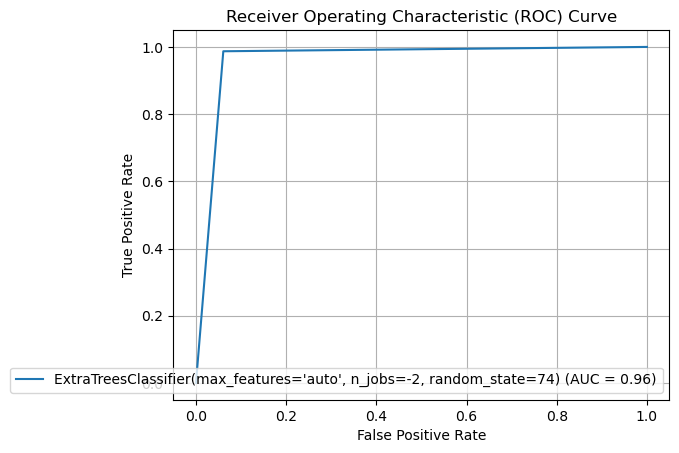

In [116]:
fpr,tpr, thresholds=metrics.roc_curve(y_test,prediction)
roc_auc=metrics.auc(fpr,tpr)
disp=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model_extratrees)
disp.plot()
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

# Saving the Model

In [117]:
file='Bank_Marketing_Prediction.pkl'
pickle.dump(final_model_extratrees,open(file,'wb'))

# Exploratory Data Analysis - Test file

In [118]:
test_data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')

In [119]:
test_df=pd.DataFrame(data=test_data)

#### Analysis the dataset

In [120]:
test_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [121]:
test_df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
5,16013,32,management,single,tertiary,no,0,yes,no,cellular,22,jul,455,2,-1,0,unknown
6,196,33,blue-collar,single,secondary,no,307,yes,no,unknown,5,may,309,2,-1,0,unknown
7,8516,37,management,married,secondary,no,341,no,no,unknown,3,jun,120,2,-1,0,unknown
8,31208,36,technician,divorced,tertiary,no,1381,no,no,cellular,2,mar,149,1,-1,0,unknown
9,38462,50,admin.,single,primary,no,181,yes,no,cellular,15,may,119,4,372,3,failure


In [122]:
test_df.tail(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13554,11568,51,unemployed,married,secondary,no,-267,no,yes,unknown,19,jun,208,2,-1,0,unknown
13555,23487,34,management,single,tertiary,no,1070,no,no,cellular,28,aug,91,15,-1,0,unknown
13556,27122,46,self-employed,married,primary,no,3155,yes,no,cellular,21,nov,271,1,-1,0,unknown
13557,837,30,services,single,secondary,no,-174,yes,no,unknown,7,may,113,1,-1,0,unknown
13558,35237,32,technician,single,secondary,no,129,yes,no,cellular,7,may,213,1,-1,0,unknown
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [123]:
test_df.shape

(13564, 17)

In [124]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


#### Counting the no. of numerical and object columns in the dataset

In [125]:
cat_columns_test=[feature for feature in test_df.columns if test_df[feature].dtypes=='O']

num_columns_test=[feature for feature in test_df.columns if test_df[feature].dtypes!='O' and feature not in 'ID']

print('Total categorical columns is {} and total numerical columns is {}'.format(len(cat_columns_test),len(num_columns_test)))

Total categorical columns is 9 and total numerical columns is 7


After a brief analysis of the dataset it can be observed that - 

- The size of the test dataset is 13564 rows and 17 columns
- The total categorical columns is 9 and total numerical columns is 8.
- By initial assesment no null values present. Need further analysis.

#### Checking for Null values 

In [126]:
total_null_values=test_df.isnull().sum()
print('The total null values present is:')
print( total_null_values)

The total null values present is:
ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


#### Checking null value using Heatmap

<Axes: >

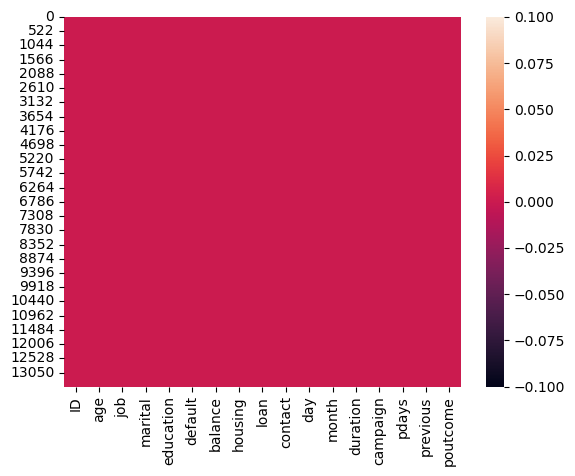

In [127]:
sns.heatmap(test_df.isnull())

- No null value presence is observed in the dataset.

#### Checking the number of unique keys and its count in categorical columns

In [128]:
for feature in cat_columns_test:
    uniq=test_df[feature].unique()
    print('{}: {} : {}'.format(feature,uniq,len(uniq)))
    print('\n')

job: ['services' 'retired' 'self-employed' 'blue-collar' 'management'
 'technician' 'admin.' 'unemployed' 'housemaid' 'entrepreneur' 'student'
 'unknown'] : 12


marital: ['married' 'divorced' 'single'] : 3


education: ['secondary' 'primary' 'tertiary' 'unknown'] : 4


default: ['no' 'yes'] : 2


housing: ['yes' 'no'] : 2


loan: ['no' 'yes'] : 2


contact: ['cellular' 'telephone' 'unknown'] : 3


month: ['may' 'jul' 'jun' 'mar' 'feb' 'sep' 'aug' 'dec' 'jan' 'apr' 'nov' 'oct'] : 12


poutcome: ['unknown' 'failure' 'other' 'success'] : 4




 - Unique keys of both test data and train data matches    

# Visualization Analysis

### Univariate Analysis

#### Countplot of each categorical column

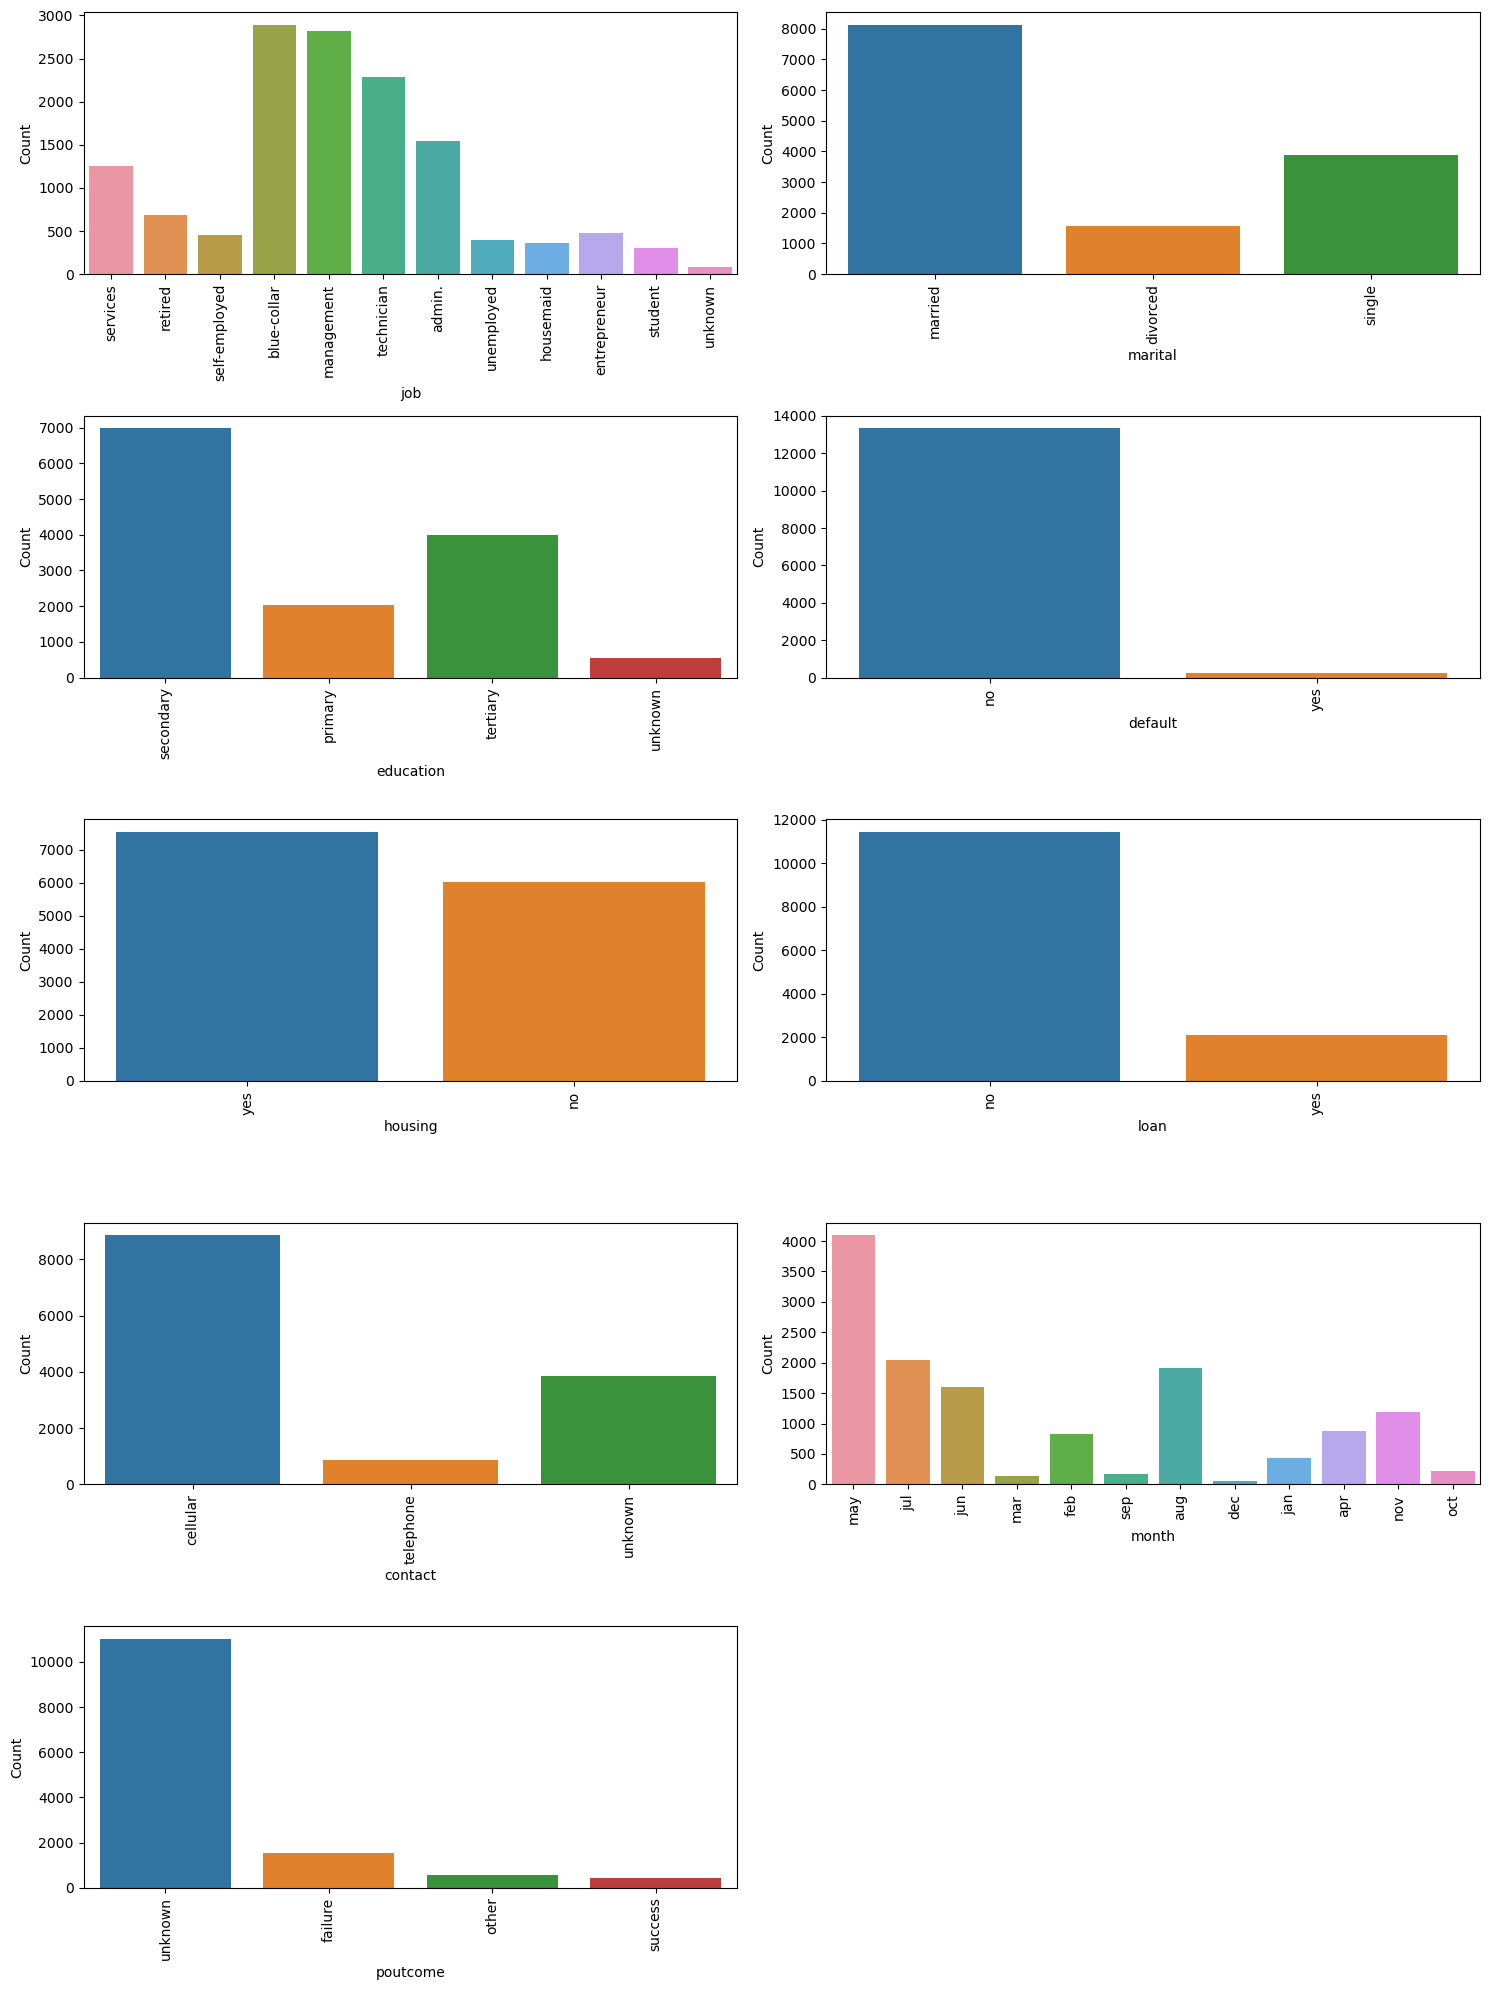

In [129]:
plt.figure(figsize=(15, 20)) 
for index, feature in enumerate(cat_columns_test):
    if index <len(cat_columns_test):
        plt.subplot(5,2,index+1)
        sns.countplot(x=feature, data=test_df)
        plt.xlabel(feature) 
        plt.ylabel('Count')
        plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

From the above count plot we can observe that -

- Most of the clients in the dataset are into Management, Technician and blue collar jobs. A moderate number of employees are into Admin and services. A low number of clients jobs are unknown.
- High number of clients in the test dataset are married. A moderate numbers of clients are sinlge. A sizable numbers of divorce clients are also present on the database.
- High number of clients have secondary education. Moderate number of clients have tertiary education and low to moderate number are primary educated. A low number of clients education is unknown.
- A very high number of clients in the dataset are no defaulters. A very low or minimum number of clients have defaulted.
- High number of clients have housing loans. Also moderate to high numbers of clients have no housing loans.
- Clients with no personal loan is very high whereas clients with personal loan is low.
- Most of the contacts with clients are done via cellular phones. A low number of clients are contacted with telephone. A moderate number of data is unknown.
- From previous marketing campaign, a very low number of clients have done term deposits. The failure is also low however it is more than success. A very high number of data are unknown or not present.

#### Checking numerical column using histplot

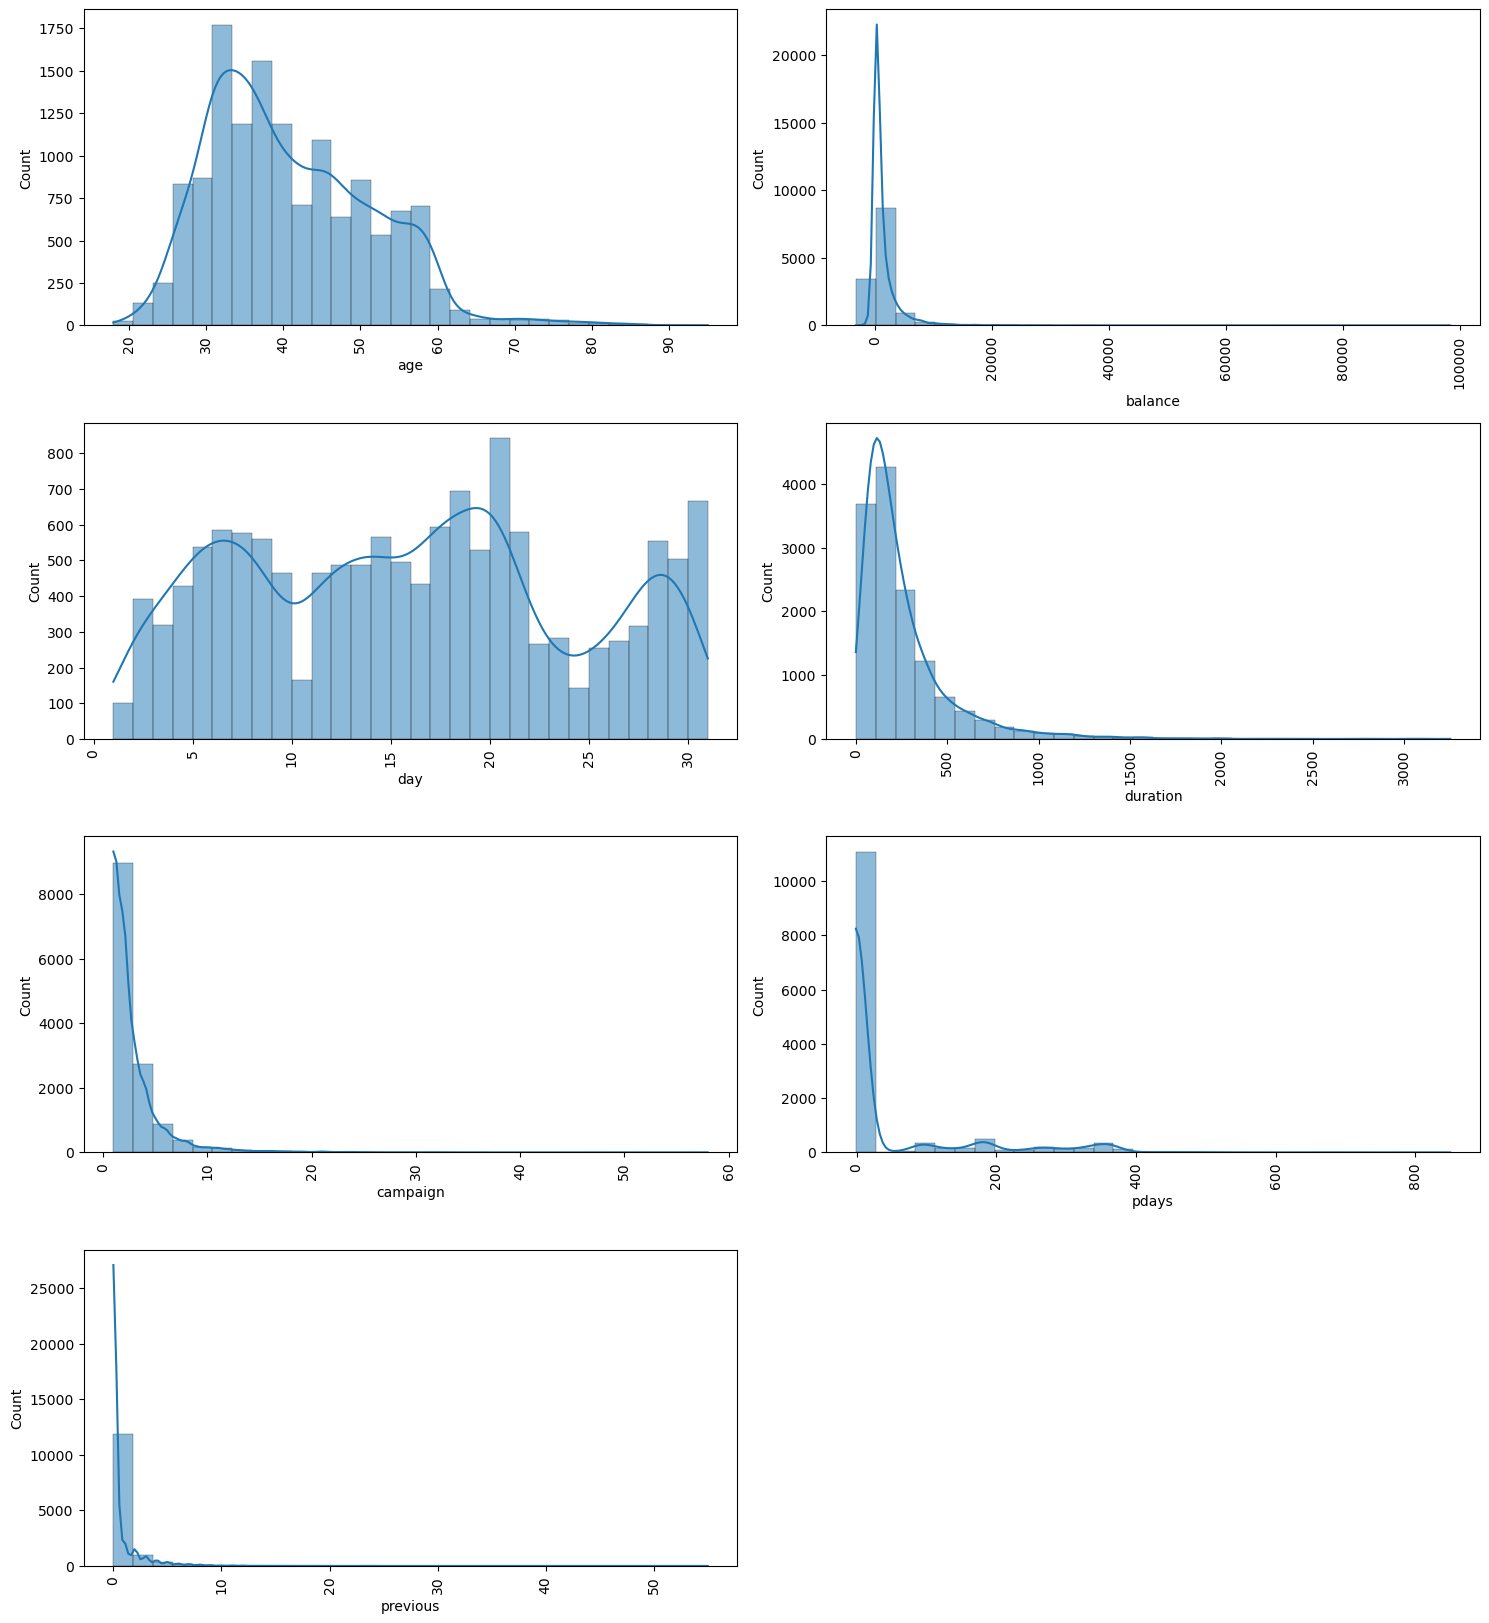

In [130]:
plt.figure(figsize=(15, 20)) 
for index, feature in enumerate(num_columns_test):
    if index <len(num_columns_test):
        plt.subplot(5,2,index+1)
        sns.histplot(x=feature, kde=True,bins=30,linewidth=.2, data=test_df)
        plt.xlabel(feature) 
        plt.ylabel('Count')
        plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

- All the columns except days has right skewness present.

# Feature Engineering

### Checking presence of Outliers

#### Checking outliers using Boxplot

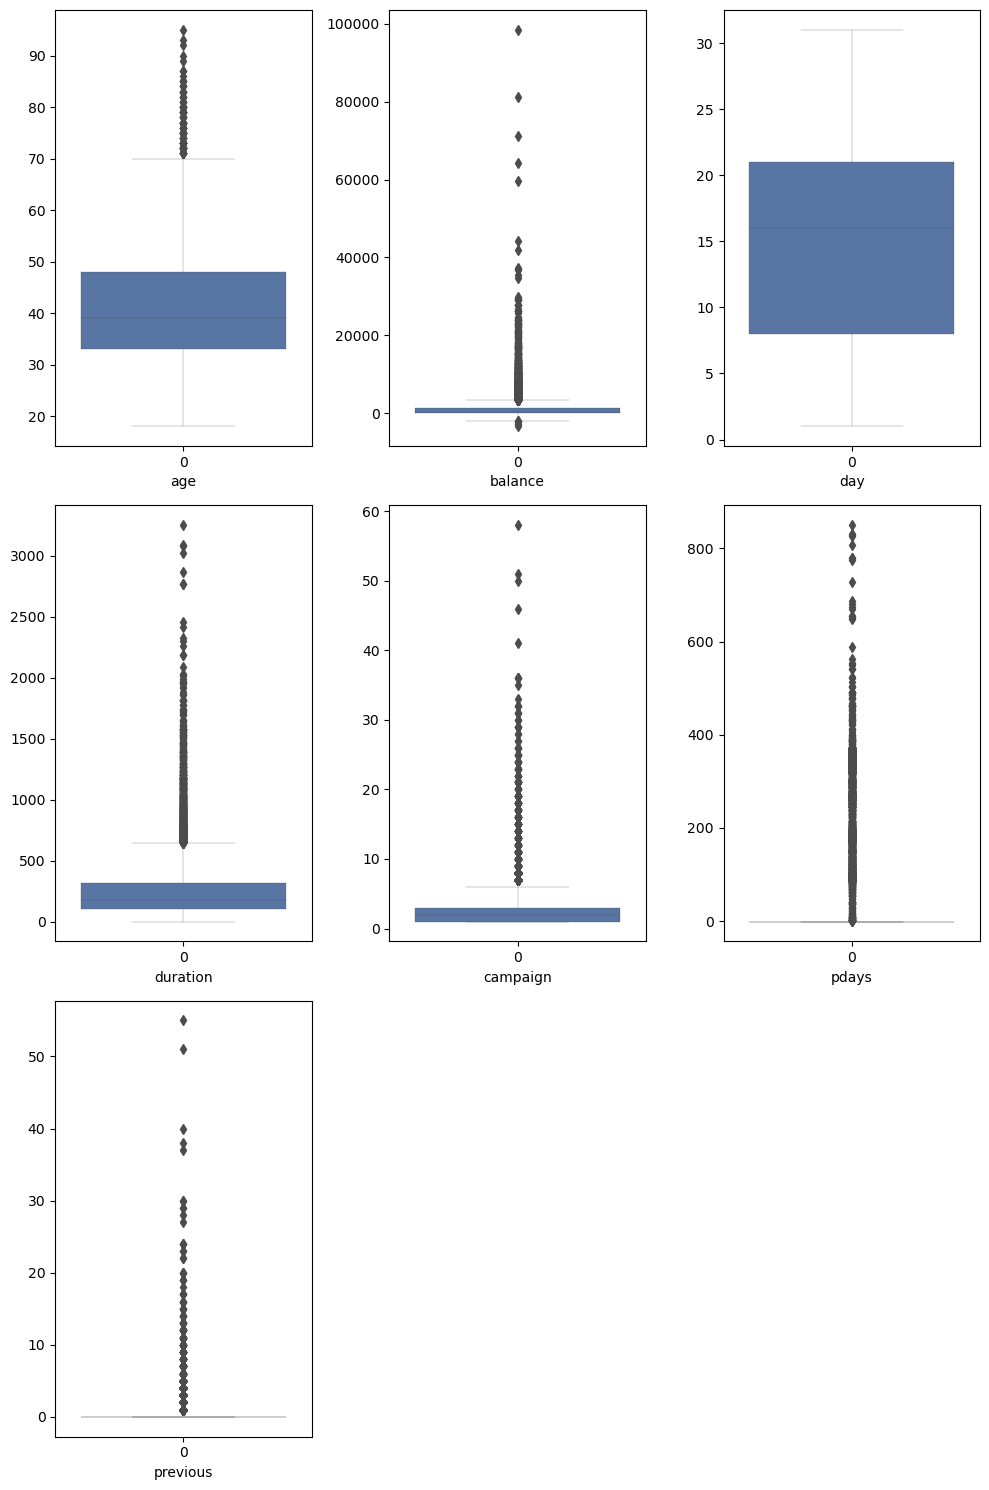

In [131]:
data=test_df.copy()
plt.figure(figsize=(10,15))
for index,feature in enumerate(num_columns_test):
    plt.subplot((len(num_columns_test)//3)+1,3,index+1)
    sns.boxplot(data[feature],palette='deep',linewidth=.2)
    plt.xlabel(feature)
plt.tight_layout()

- We can observe that all the features in the test dataset have high presence of outliers accept days.

#### Dropping the column pdays from data

In [132]:
data.drop('pdays',axis=1,inplace=True)

#### Checking pdays value_count with unique value frequencies

In [133]:
test_df['previous'].value_counts(normalize=True)

previous
0     0.813182
1     0.062740
2     0.046078
3     0.026688
4     0.015703
5     0.010911
6     0.006561
7     0.004940
8     0.003539
9     0.002064
11    0.001401
10    0.001327
12    0.001032
13    0.000590
14    0.000369
16    0.000369
15    0.000369
17    0.000295
24    0.000221
19    0.000221
20    0.000221
30    0.000147
23    0.000147
22    0.000147
29    0.000147
27    0.000074
51    0.000074
40    0.000074
38    0.000074
28    0.000074
18    0.000074
55    0.000074
37    0.000074
Name: proportion, dtype: float64

- The presence of outliers in previous column is higha and 82 percent of the data in the column is 0. Hence we can drop the column.

#### Dropping the column previous from data

In [134]:
data.drop('previous',axis=1,inplace=True)

#### Analyzing outliers using zscore

In [135]:
def outliers_detection(data):
    z_score=np.abs(zscore(data[num_columns_test]))
    return z_score

In [136]:
z_score=outliers_detection(test_df)

#### Removing outliers

In [137]:
def removing_outliers(z_score,data):
    data=data[(z_score<3).all(axis=1)]
    return data

In [138]:
data=removing_outliers(z_score,data)

#### Calculating total data loss count

In [139]:
total_data_loss=test_df.shape[0]-data.shape[0]
print('The total data lost due to outliers is:', total_data_loss)

The total data lost due to outliers is: 1530


#### Calculating percentage of data loss 

In [140]:
total_data=test_df.shape[0]
percent=total_data_loss*100/total_data
print('Total percentage of data lost is: {:.2f}%'.format(percent))

Total percentage of data lost is: 11.28%


#### Assigning data to test_df

In [141]:
test_df=data

#### Checking the shape of dataset after removing outliers

In [142]:
test_df.shape

(12034, 15)

# Checking the skewness

In [143]:
num_columns_test=[feature for feature in test_df.columns if test_df[feature].dtypes!='O' and feature not in 'ID']
num_columns_test

['age', 'balance', 'day', 'duration', 'campaign']

#### Checking skewness using skew

In [144]:
test_df[num_columns_test].skew()

age         0.435270
balance     2.476671
day         0.100926
duration    1.578135
campaign    1.958366
dtype: float64

- Column balance, duration and campaign has high skewness present.

#### Checking for the presence of value 0 in all the columns

In [145]:
columns_num_feature=(test_df[num_columns_test]==0).any()
columns_num_feature

age         False
balance      True
day         False
duration     True
campaign    False
dtype: bool

- Column balance and duration has 0 value present

#### Removing skewness in balance using cube root

In [146]:
balance_skewed_cube_root=np.cbrt(test_df['balance'])

In [147]:
balance_skewed_cube_root.skew()

-0.41219046733760817

####  Applying cube root to balance

In [148]:
test_df['balance']=balance_skewed_cube_root

In [149]:
test_df[num_columns].skew()

age         0.435270
balance    -0.412190
day         0.100926
duration    1.578135
campaign    1.958366
dtype: float64

#### Removing skewness in duration using cube root

In [150]:
duration_skewed=np.cbrt(test_df['duration'])

In [151]:
duration_skewed.skew()

0.29002880399493136

#### Applying cube root to duration

In [152]:
test_df['duration']=duration_skewed

In [153]:
test_df[num_columns].skew()

age         0.435270
balance    -0.412190
day         0.100926
duration    0.290029
campaign    1.958366
dtype: float64

####  Removing skewness in campaign using log transformation

In [154]:
campaign_skewed=np.log(test_df['campaign'])

In [155]:
campaign_skewed.skew()

0.5775251196940545

#### Applying log to campaign

In [156]:
test_df['campaign']=campaign_skewed

#### Checking the final skewness in the dataset

In [157]:
test_df[num_columns].skew()

age         0.435270
balance    -0.412190
day         0.100926
duration    0.290029
campaign    0.577525
dtype: float64

- Skewness in the dataset in under acceptable range

# Feature selection

In [158]:
features=test_df.columns
features

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'poutcome'],
      dtype='object')

#### Dropping column ID

In [159]:
test_df.drop('ID',axis=1,inplace=True)

#### Dropping column default

In [160]:
test_df.drop('default',axis=1,inplace=True)

# Encoding categorical columns

#### Listing categorical columns for encoding

In [161]:
cat_columns_test=[feature for feature in test_df.columns if test_df[feature].dtypes=='O']
cat_columns_test

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

#### Performing LabelEncoder

In [162]:
test_df[cat_columns_test]=test_df[cat_columns_test].apply(lambda column: le.fit_transform(column))

In [163]:
test_df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,32,7,1,1,4.904868,1,0,0,15,8,2.714418,1.791759,3
2,31,6,2,2,5.241483,1,0,2,16,8,8.776383,0.000000,3
3,57,7,2,0,15.573360,1,0,1,13,8,4.020726,0.693147,3
4,45,1,0,1,-8.900130,0,1,2,3,5,4.805896,0.000000,3
5,32,4,2,2,0.000000,1,0,0,22,5,7.691372,0.693147,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13558,32,9,2,1,5.052774,1,0,0,7,8,5.972093,0.000000,3
13559,39,4,1,2,3.556893,0,0,0,28,1,5.289572,1.386294,3
13560,54,1,1,0,13.163613,1,0,2,20,6,5.406120,0.000000,3
13561,35,5,1,0,6.580844,1,0,0,29,4,5.142563,0.000000,3


# Scaling the Dataset

#### Scaling the dataset using standard scaler

In [164]:
def StandardScaling(test_df):
    ss=StandardScaler()
    test_df=pd.DataFrame(ss.fit_transform(test_df),columns=test_df.columns)
    return test_df

In [165]:
test_df=StandardScaling(test_df)

In [166]:
test_df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,-0.857298,0.802830,-0.273350,-0.298454,-0.362324,0.897827,-0.436241,-0.725087,-0.085446,0.846484,-1.940045,1.744943,0.390323
1,-0.956183,0.498452,1.368116,1.050250,-0.307873,0.897827,-0.436241,1.472546,0.035213,0.846484,1.912430,-1.027531,0.390323
2,1.614839,0.802830,1.368116,-1.647159,1.363415,0.897827,-0.436241,0.373729,-0.326763,0.846484,-1.109865,0.045008,0.390323
3,0.428213,-1.023436,-1.914817,-0.298454,-2.595425,-1.113800,2.292308,1.472546,-1.533350,-0.156594,-0.610877,-1.027531,0.390323
4,-0.857298,-0.110303,1.368116,1.050250,-1.155737,0.897827,-0.436241,-0.725087,0.759165,-0.156594,1.222888,0.045008,0.390323
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12029,-0.857298,1.411585,1.368116,-0.298454,-0.338398,0.897827,-0.436241,-0.725087,-1.050715,0.846484,0.130259,-1.027531,0.390323
12030,-0.165099,-0.110303,-0.273350,1.050250,-0.580373,-1.113800,-0.436241,-0.725087,1.483117,-1.494030,-0.303493,1.117548,0.390323
12031,1.318182,-1.023436,-0.273350,-1.647159,0.973614,0.897827,-0.436241,1.472546,0.517848,0.177765,-0.229425,-1.027531,0.390323
12032,-0.560641,0.194074,-0.273350,-1.647159,-0.091217,0.897827,-0.436241,-0.725087,1.603776,-0.490953,-0.396920,-1.027531,0.390323


# Variance Inflation Factor

In [167]:
def vif_cal(test_df):
    vif=pd.DataFrame()
    vif['Features']=test_df.columns
    vif['VIF Factor']=[VIF(test_df.values,i) for i in range(test_df.shape[1])]
    return vif

In [168]:
vif_cal(test_df)

,Features,VIF Factor
0,age,1.269911
1,job,1.044242
2,marital,1.216281
3,education,1.061401
4,balance,1.049366
5,housing,1.173643
6,loan,1.031683
7,contact,1.315778
8,day,1.025310
9,month,1.275220


- The variance inflation factor in the dataset is within the acceptable range.
- Now the test dataset is ready for testing.

# Testing the test dataset 

In [169]:
test_model=pickle.load(open('Bank_Marketing_Prediction.pkl','rb'))
pred=test_model.predict(test_df)
print(pred)

[0 1 0 ... 0 0 1]
